# **Análise Exploratória de Dados**

Este notebook visa explorar os dados disponíveis buscando por insghts, anomalias e valores inválidos entre os dados.

No decorrer do notebook estarei analisando cada dado que posteriormente poderei incluir no dashboard final deste projeto.

## **Importando os dados**

In [93]:
# importar bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.tokens import Doc
from spacy.lang.pt.stop_words import STOP_WORDS

from wordcloud import WordCloud

from src.utils.common import load_object
from src.constants import LDA_PREPROCESSOR_PATH
from src.constants import LDA_MODEL_PATH

import locale

from pathlib import Path

In [94]:
# configurar linguagem para pt-br
locale = locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

In [2]:
# configurar estilo do seaborn
sns.set_style('darkgrid')

In [3]:
# configurar o pandas para mostrar mais colunas
pd.set_option('display.max_columns', 50)

In [4]:
# importar os dados
df = pd.read_csv(Path('../artifacts/data_ingestion/data.csv'))

In [5]:
# mostrar dataset
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.186877,-44.540232,-19.807885,-43.980818
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,-16.745150,-48.514783,-21.363473,-48.229588


In [6]:
# mostrar informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_status                   119143 non-null  object 
 2   order_purchase_timestamp       119143 non-null  object 
 3   order_approved_at              118966 non-null  object 
 4   order_delivered_carrier_date   117057 non-null  object 
 5   order_delivered_customer_date  115722 non-null  object 
 6   order_estimated_delivery_date  119143 non-null  object 
 7   review_id                      118146 non-null  object 
 8   review_score                   118146 non-null  float64
 9   review_comment_title           13989 non-null   object 
 10  review_comment_message         50245 non-null   object 
 11  review_creation_date           118146 non-null  object 
 12  review_answer_timestamp       

## **Dicionário de variáveis**

Ao todo, os dados possuem **119143 entradas e 40 colunas**, das quais:

1. **order_id:**
    * identificador da encomenda.
    * qualitativo nominal.


2. **order_status:**
    * situação da encomenda.
    * qualitativo nominal.


3. **order_purchase_timestamp:**
    * data da compra.
    * qualitativa ordinal.


4. **order_approved_at:**
    * data de aprovação do pagamento.
    * qualitativa ordinal.


5. **order_delivered_carrier_date:**
    * data de postagem do pedido.
    * qualitativa ordinal.


6. **order_delivered_customer_date:**
    * data da entrega do pedido.
    * qualitativa ordinal.


7. **order_estimated_delivery_date:**
    * data prevista da entrega do pedido.
    * qualitativa ordinal.


8. **review_id:**
    * identificador da review.
    * qualitativa nominal.


9. **review_score:**
    * nota de satisfação do cliente (de 1 a 5).
    * qualitativa ordinal.


10. **review_comment_title:**
    * título do comentário da review.
    * dado não estruturado.


11. **review_comment_message:**
    * menssagem do comentário da review.
    * dado não estruturado.


12. **review_creation_date:**
    * data em que a pesquisa de satisfação foi mandada ao cliente.
    * qualitativa ordinal.


13. **review_answer_timestamp:**
    * data em que a pesquisa de satisfação foi respondida.
    * qualitativa ordinal.


14. **payment_sequential:**
    * um cliente pode pagar pelo pedido com mais de uma forma de pagamento. Caso isso aconteça, esta variável indica a sequência de pagamentos.
    * qualitativa ordinal.


15. **payment_type:**
    * indica o método de pagamento.
    * qualitativa nominal.


16. **payment_installments:**
    * número de parcelas que o cliente escolheu pagar.
    * quantitativa discreta.


17. **payment_value:**
    * valor da transação.
    * quantitativa contínua.


18. **order_item_id:**
    * indica de forma sequencial o número de items incluídos no mesmo pedido.
    * quantitativa discreta.


19. **product_id:**
    * identificador do produto.
    * qualitativa nominal.


20. **seller_id:**
    * identificador do vendedor.
    * qualitativa nominal.


21. **shipping_limit_date:**
    * data limite para o vendedor enviar o produto ao parceiro logístico.
    * qualitativa ordinal.


22. **price:**
    * valor do item.
    * quantitativa contínua.


23. **freight_value:**
    * valor do frete.
    * quantitativa contínua.


24. **product_category_name:**
    * categoria no produto.
    * qualitativa nominal.


25. **product_name_lenght:**
    * quantidade de caracteres extraídos do nome do produto.
    * quantitativa discreta.


26. **product_description_lenght:**
    * quantidade de caracteres extraídos da descrição do produto.
    * quantitativa discreta.


27. **product_photos_qty:**
    * número de fotos do produto publicado.
    * quantitativa discreta.


28. **product_weight_g:**
    * peso do produto em gramas.
    * quantitativa contínua.


29. **product_length_cm:**
    * comprimento do produto em cm.
    * quantitativa contínua.


30. **product_height_cm:**
    * altura do produto em cm.
    * quantitativa contínua.


31. **product_width_cm:**
    * largura do produto em cm.
    * quantitativa contínua.


32. **seller_city:**
    * cidade do vendedor.
    * qualitatica nominal.


33. **seller_state:**
    * estado do vendedor.
    * qualitatica nominal.


34. **customer_unique_id:**
    * identificador do cliente.
    * qualitatica nominal.


35. **customer_city:**
    * cidade do comprador.
    * qualitatica nominal.


36. **customer_state:**
    * estado do comprador.
    * qualitatica nominal.


37. **mean_lat_costumer:**
    * latitude média do comprador (média das latitudes dos compradores com mesmo prefixo de CEP).
    * quantitativa contínua.


38. **mean_lon_costumer:**
    * longitude média do comprador (média das longitudes dos compradores com mesmo prefixo de CEP).
    * quantitativa contínua.


39. **mean_lat_seller:**
    * latitude média do vendedor (média das latitudes dos vendedores com mesmo prefixo de CEP).
    * quantitativa contínua.


40. **mean_lon_seller:**
    * latitude média do vendedor (média das longitudes dos vendedores com mesmo prefixo de CEP).
    * quantitativa contínua.

### **Insights**

* Os tipos dos dados parecem consistentes com as variáveis exceto as que indicam datas.

* Pela quantidade de valores nulos presentes nos dados, consigo inferir que metade do dataset não possui review escrita.

* Ainda, quase todas as instâncias contam com avaliação de satisfação (review_score).

## **Variáveis de data**

As variáveis referentes a data podem ser manipuladas em um formato mais eficiente. E para fazer esta alteração eu vou aproveitar do fato que as variáveis referentes a data terminam em **`_date`**, **`_timestamp`** e **`at`**.

In [7]:
# mudar as variáveis de data para datetime
for column in df.columns:
    if column.endswith(('_date', '_timestamp', '_at')):
        df[column] = pd.to_datetime(df[column])

In [8]:
# visualizar tipo dos dados
df.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetim

## **Verificando valores nulos**

Algumas variáveis apresentam valores nulos, e é sempre bom tentar entender o que está acontecendo. Por isso vou dar uma olhada nos valores nulos.

**As variáveis com valores nulos são:**

`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `review_id`, `review_score`, `review_comment_title`, `review_comment_message`, `review_creation_date`, `review_answer_timestamp`, `payment_sequential`, `payment_type`, `payment_installments`, `payment_value`, `order_item_id`, `product_id`, `seller_id`, `shipping_limit_date`, `price`, `freight_value`, `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, `seller_city`, `seller_state`, `mean_lat_costumer`, `mean_lon_costumer`, `mean_lat_seller` e `mean_lon_seller`

In [9]:
# mostrar os primeiros 5 exemplos de cada variável que tem valores nulos
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print(f'Valores nulos de {column}.')
        display(df[df[column].isnull()].head())

Valores nulos de order_approved_at.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN
2142,ed3efbd3a87bea76c2812c66a0b32219,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,6e4344680dbd30c75f78394e0dcfffdf,2.0,NaN,O produto veio com defeito ele não liga não fu...,2018-07-28,2018-07-30 11:06:16,1.0,voucher,1.0,191.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08642cd329066fe11ec63293f714f2f8,santa luzia,MG,-19.776069,-43.872957,NaN,NaN
2232,df8282afe61008dc26c6c31011474d02,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,d15ec7fbf73d246a918e3bf1a7e5f268,3.0,NaN,Razoável,2017-04-12,2017-04-12 14:18:26,1.0,boleto,1.0,139.96,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c219f4ac1bc7f1aea33e6ab8885831e8,castanhal,PA,-1.289163,-47.938224,NaN,NaN
2429,8d4c637f1accf7a88a4555f02741e606,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,0f54fea9e89c2a9398b2bd56e3880eda,5.0,Adorei,NaN,2018-08-26,2018-08-26 20:21:38,1.0,voucher,1.0,66.44,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dd81392e5eee5d979c629a76abec2a,campinas,SP,-22.942851,-47.151879,NaN,NaN
2586,7a9d4c7f9b068337875b95465330f2fc,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,fda38b7c98f571ef4c6da9eba2b417c6,5.0,NaN,NaN,2017-06-01,2017-06-01 08:21:44,1.0,credit_card,2.0,72.90,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29dc4aeff866d6a940c471a3ea4faef0,sao paulo,SP,-23.619469,-46.751130,NaN,NaN


Valores nulos de order_delivered_carrier_date.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,1.0,credit_card,1.0,65.95,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.9,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,-27.866213,-54.470411,-23.541383,-46.711850
125,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,c4b17a374b71539eb360fe5baaa9a10e,3.0,bolo fake,"Gostei do produto, porem fiquei preocupada não...",2018-08-25,2018-08-29 10:48:52,1.0,boleto,1.0,50.35,1.0,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.0,15.35,artigos_de_natal,35.0,415.0,4.0,550.0,37.0,10.0,37.0,sao paulo,SP,c7f8d7b1fffc946d7069574f74c39f4e,santo amaro da imperatriz,SC,-27.688477,-48.773253,-23.526467,-46.533524
155,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,8079a046b23b88c4cea485cfbd8aec39,5.0,NaN,NaN,2017-10-05,2017-10-05 12:55:11,1.0,credit_card,2.0,138.28,1.0,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.9,12.38,perfumaria,59.0,149.0,1.0,500.0,36.0,18.0,27.0,presidente prudente,SP,9f269af9c49244f6ba4a46985a3cfc2e,sao paulo,SP,-23.559560,-46.531456,-22.111149,-51.399319
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
385,d3c8851a6651eeff2f73b0e011ac45d0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,160850927a5f16f903dc83a05e0a5826,1.0,NaN,NaN,2016-12-11,2016-12-13 10:17:32,1.0,credit_card,1.0,299.84,1.0,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267.0,32.84,livros_tecnicos,32.0,2228.0,1.0,1900.0,30.0,6.0,30.0,rio branco,AC,07d5b1f9bdd053347f0213187b343ac9,sao paulo,SP,-23.541182,-46.518306,-9.966664,-67.813790


Valores nulos de order_delivered_customer_date.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,1.0,credit_card,1.0,65.95,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,-27.866213,-54.470411,-23.541383,-46.711850
51,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,5853e27c64b89e222c5e4edf78bec3d4,1.0,NaN,NaN,2018-07-01,2018-07-11 20:41:18,1.0,boleto,1.0,22.36,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,beleza_saude,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,praia grande,SP,08fb46d35bb3ab4037202c23592d1259,jundiai,SP,-23.169423,-46.886770,-24.008185,-46.419212
125,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,c4b17a374b71539eb360fe5baaa9a10e,3.0,bolo fake,"Gostei do produto, porem fiquei preocupada não...",2018-08-25,2018-08-29 10:48:52,1.0,boleto,1.0,50.35,1.0,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.00,15.35,artigos_de_natal,35.0,415.0,4.0,550.0,37.0,10.0,37.0,sao paulo,SP,c7f8d7b1fffc946d7069574f74c39f4e,santo amaro da imperatriz,SC,-27.688477,-48.773253,-23.526467,-46.533524
155,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,8079a046b23b88c4cea485cfbd8aec39,5.0,NaN,NaN,2017-10-05,2017-10-05 12:55:11,1.0,credit_card,2.0,138.28,1.0,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.90,12.38,perfumaria,59.0,149.0,1.0,500.0,36.0,18.0,27.0,presidente prudente,SP,9f269af9c49244f6ba4a46985a3cfc2e,sao paulo,SP,-23.559560,-46.531456,-22.111149,-51.399319
192,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,69.12,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,santo andre,SP,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,-17.224250,-46.874260,-23.659354,-46.523359


Valores nulos de review_id.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
20,403b97836b0c04a622354cf531062e5f,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,10.0,1376.45,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,construcao_ferramentas_construcao,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,mogi das cruzes,SP,6e26bbeaa107ec34112c64e1ee31c0f5,rio de janeiro,RJ,-22.879051,-43.314227,-23.482110,-46.138858
192,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,69.12,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,santo andre,SP,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,-17.224250,-46.874260,-23.659354,-46.523359
371,4906eeadde5f70b308c20c4a8f20be02,delivered,2017-12-08 04:45:26,2017-12-12 03:50:30,2017-12-12 17:43:21,2018-01-09 18:04:58,2018-01-03,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,162.25,1.0,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,2017-12-18 03:50:30,144.99,17.26,cool_stuff,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,sao paulo,SP,ea870f4fdfd85ac98ab775b76efe3143,rio de janeiro,RJ,-22.884220,-43.618942,-23.552353,-46.536647
455,b7a4a9ecb1cd3ef6a3e36a48e200e3be,delivered,2017-05-19 18:13:54,2017-05-20 11:35:41,2017-05-30 12:43:50,2017-06-08 07:53:42,2017-06-16,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,4.0,41.10,1.0,41171e11f920c47deb1809edda2bf09d,c42fd8e4d47dfb18ce5222f2dd7752f9,2017-05-30 11:35:41,26.00,15.10,moveis_decoracao,64.0,669.0,4.0,200.0,16.0,16.0,16.0,osasco,SP,367f4686d7112d69feed92b02a1775ed,lages,SC,-27.817961,-50.330845,-23.498812,-46.807021
463,59b32faedc12322c672e95ec3716d614,delivered,2018-06-27 11:10:11,2018-06-28 02:15:51,2018-06-28 14:57:00,2018-07-06 16:37:36,2018-07-26,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,87.58,1.0,040f34fe061b6024771f641fe922e782,850f4f8af5ea87287ac68de36e29107f,2018-07-02 02:15:51,69.00,18.58,relogios_presentes,18.0,796.0,2.0,750.0,18.0,10.0,15.0,sao paulo,SP,c56d066e503008b8d0bf4204857c588d,santa maria,RS,-29.699222,-53.736749,-23.651131,-46.666747


Valores nulos de review_score.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
20,403b97836b0c04a622354cf531062e5f,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,10.0,1376.45,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,construcao_ferramentas_construcao,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,mogi das cruzes,SP,6e26bbeaa107ec34112c64e1ee31c0f5,rio de janeiro,RJ,-22.879051,-43.314227,-23.482110,-46.138858
192,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,69.12,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,santo andre,SP,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,-17.224250,-46.874260,-23.659354,-46.523359
371,4906eeadde5f70b308c20c4a8f20be02,delivered,2017-12-08 04:45:26,2017-12-12 03:50:30,2017-12-12 17:43:21,2018-01-09 18:04:58,2018-01-03,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,162.25,1.0,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,2017-12-18 03:50:30,144.99,17.26,cool_stuff,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,sao paulo,SP,ea870f4fdfd85ac98ab775b76efe3143,rio de janeiro,RJ,-22.884220,-43.618942,-23.552353,-46.536647
455,b7a4a9ecb1cd3ef6a3e36a48e200e3be,delivered,2017-05-19 18:13:54,2017-05-20 11:35:41,2017-05-30 12:43:50,2017-06-08 07:53:42,2017-06-16,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,4.0,41.10,1.0,41171e11f920c47deb1809edda2bf09d,c42fd8e4d47dfb18ce5222f2dd7752f9,2017-05-30 11:35:41,26.00,15.10,moveis_decoracao,64.0,669.0,4.0,200.0,16.0,16.0,16.0,osasco,SP,367f4686d7112d69feed92b02a1775ed,lages,SC,-27.817961,-50.330845,-23.498812,-46.807021
463,59b32faedc12322c672e95ec3716d614,delivered,2018-06-27 11:10:11,2018-06-28 02:15:51,2018-06-28 14:57:00,2018-07-06 16:37:36,2018-07-26,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,87.58,1.0,040f34fe061b6024771f641fe922e782,850f4f8af5ea87287ac68de36e29107f,2018-07-02 02:15:51,69.00,18.58,relogios_presentes,18.0,796.0,2.0,750.0,18.0,10.0,15.0,sao paulo,SP,c56d066e503008b8d0bf4204857c588d,santa maria,RS,-29.699222,-53.736749,-23.651131,-46.666747


Valores nulos de review_comment_title.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,-16.745150,-48.514783,-21.363473,-48.229588
5,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,1.0,credit_card,1.0,72.20,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,-5.774002,-35.270976,-19.836871,-43.923241


Valores nulos de review_comment_message.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,-16.745150,-48.514783,-21.363473,-48.229588
6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,1.0,credit_card,1.0,28.62,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,-23.676257,-46.514580,-23.541525,-46.262148
7,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,89b738e70a1ce346db29a20fb2910161,4.0,NaN,NaN,2017-07-27,2017-07-27 22:48:30,1.0,credit_card,6.0,175.26,1.0,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,guarulhos,SP,80bb27c7c16e8f973207a5086ab329e2,congonhinhas,PR,-23.553601,-50.549812,-23.469087,-46.515649
9,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,07d67dd06ed5f88bef11ef6b464e79ae,5.0,NaN,NaN,2017-05-27,2017-05-28 02:59:57,1.0,credit_card,3.0,75.16,1.0,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0,atibaia,SP,932afa1e708222e5821dac9cd5db4cae,nilopolis,RJ,-22.805674,-43.423059,-23.114661,-46.553045
10,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1.0,NaN,NaN,2017-02-03,2017-02-05 01:58:35,1.0,boleto,1.0,35.95,1.0,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0,sao jose do rio pardo,SP,39382392765b6dc74812866ee5ee92a7,faxinalzinho,RS,-27.421769,-52.675022,-21.584558,-46.942793


Valores nulos de review_creation_date.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
20,403b97836b0c04a622354cf531062e5f,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,10.0,1376.45,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,construcao_ferramentas_construcao,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,mogi das cruzes,SP,6e26bbeaa107ec34112c64e1ee31c0f5,rio de janeiro,RJ,-22.879051,-43.314227,-23.482110,-46.138858
192,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,69.12,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,santo andre,SP,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,-17.224250,-46.874260,-23.659354,-46.523359
371,4906eeadde5f70b308c20c4a8f20be02,delivered,2017-12-08 04:45:26,2017-12-12 03:50:30,2017-12-12 17:43:21,2018-01-09 18:04:58,2018-01-03,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,162.25,1.0,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,2017-12-18 03:50:30,144.99,17.26,cool_stuff,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,sao paulo,SP,ea870f4fdfd85ac98ab775b76efe3143,rio de janeiro,RJ,-22.884220,-43.618942,-23.552353,-46.536647
455,b7a4a9ecb1cd3ef6a3e36a48e200e3be,delivered,2017-05-19 18:13:54,2017-05-20 11:35:41,2017-05-30 12:43:50,2017-06-08 07:53:42,2017-06-16,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,4.0,41.10,1.0,41171e11f920c47deb1809edda2bf09d,c42fd8e4d47dfb18ce5222f2dd7752f9,2017-05-30 11:35:41,26.00,15.10,moveis_decoracao,64.0,669.0,4.0,200.0,16.0,16.0,16.0,osasco,SP,367f4686d7112d69feed92b02a1775ed,lages,SC,-27.817961,-50.330845,-23.498812,-46.807021
463,59b32faedc12322c672e95ec3716d614,delivered,2018-06-27 11:10:11,2018-06-28 02:15:51,2018-06-28 14:57:00,2018-07-06 16:37:36,2018-07-26,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,87.58,1.0,040f34fe061b6024771f641fe922e782,850f4f8af5ea87287ac68de36e29107f,2018-07-02 02:15:51,69.00,18.58,relogios_presentes,18.0,796.0,2.0,750.0,18.0,10.0,15.0,sao paulo,SP,c56d066e503008b8d0bf4204857c588d,santa maria,RS,-29.699222,-53.736749,-23.651131,-46.666747


Valores nulos de review_answer_timestamp.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
20,403b97836b0c04a622354cf531062e5f,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,10.0,1376.45,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,construcao_ferramentas_construcao,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,mogi das cruzes,SP,6e26bbeaa107ec34112c64e1ee31c0f5,rio de janeiro,RJ,-22.879051,-43.314227,-23.482110,-46.138858
192,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,69.12,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,santo andre,SP,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,-17.224250,-46.874260,-23.659354,-46.523359
371,4906eeadde5f70b308c20c4a8f20be02,delivered,2017-12-08 04:45:26,2017-12-12 03:50:30,2017-12-12 17:43:21,2018-01-09 18:04:58,2018-01-03,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,162.25,1.0,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,2017-12-18 03:50:30,144.99,17.26,cool_stuff,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,sao paulo,SP,ea870f4fdfd85ac98ab775b76efe3143,rio de janeiro,RJ,-22.884220,-43.618942,-23.552353,-46.536647
455,b7a4a9ecb1cd3ef6a3e36a48e200e3be,delivered,2017-05-19 18:13:54,2017-05-20 11:35:41,2017-05-30 12:43:50,2017-06-08 07:53:42,2017-06-16,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,4.0,41.10,1.0,41171e11f920c47deb1809edda2bf09d,c42fd8e4d47dfb18ce5222f2dd7752f9,2017-05-30 11:35:41,26.00,15.10,moveis_decoracao,64.0,669.0,4.0,200.0,16.0,16.0,16.0,osasco,SP,367f4686d7112d69feed92b02a1775ed,lages,SC,-27.817961,-50.330845,-23.498812,-46.807021
463,59b32faedc12322c672e95ec3716d614,delivered,2018-06-27 11:10:11,2018-06-28 02:15:51,2018-06-28 14:57:00,2018-07-06 16:37:36,2018-07-26,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,87.58,1.0,040f34fe061b6024771f641fe922e782,850f4f8af5ea87287ac68de36e29107f,2018-07-02 02:15:51,69.00,18.58,relogios_presentes,18.0,796.0,2.0,750.0,18.0,10.0,15.0,sao paulo,SP,c56d066e503008b8d0bf4204857c588d,santa maria,RS,-29.699222,-53.736749,-23.651131,-46.666747


Valores nulos de payment_sequential.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
36864,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36865,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36866,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064


Valores nulos de payment_type.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
36864,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36865,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36866,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064


Valores nulos de payment_installments.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
36864,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36865,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36866,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064


Valores nulos de payment_value.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
36864,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36865,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064
36866,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,curitiba,PR,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.585829,-47.863559,-25.507089,-49.276064


Valores nulos de order_item_id.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de product_id.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de seller_id.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de shipping_limit_date.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de price.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de freight_value.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de product_category_name.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,1.0,credit_card,1.0,65.95,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,-27.866213,-54.470411,-23.541383,-46.711850
129,bfe42c22ecbf90bc9f35cf591270b6a7,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,53cf7b4afe46cf70cde7948d8001d19e,5.0,NaN,NaN,2018-02-10,2018-02-12 13:26:21,1.0,credit_card,1.0,42.40,1.0,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,2018-01-31 22:16:18,27.30,15.10,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,limeira,SP,34c58672601f2c6d29db7efd1f6bf958,bonfinopolis de minas,MG,-16.563527,-45.993358,-22.560556,-47.446377
221,58ac1947c1a9067b9f416cba6d844a3f,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,d734648af60219fadf470e2d8535163e,5.0,NaN,NaN,2017-09-22,2017-09-23 10:28:15,1.0,credit_card,5.0,124.16,1.0,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,2017-09-19 13:45:43,110.00,14.16,NaN,NaN,NaN,NaN,10800.0,40.0,40.0,30.0,santos,SP,5cbf29b2dcf212a6a5d864b887238c72,sao paulo,SP,-23.744911,-46.685270,-23.954263,-46.337663
274,e22b71f6e4a481445ec4527cb4c405f7,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11,86e4141a3c56080e60189d18a7e3cb0e,4.0,NaN,NaN,2017-05-03,2017-05-04 09:36:56,1.0,credit_card,3.0,34.24,1.0,3bc5164bc7f4be77002d6651da65c98c,6cd68b3ed6d59aaa9fece558ad360c0a,2017-04-27 14:01:13,22.50,11.74,NaN,NaN,NaN,NaN,550.0,16.0,11.0,19.0,belo horizonte,MG,1268b060098ed3f22c2e7c34cc72a1a8,itapagipe,MG,-19.900801,-49.368730,-19.869634,-43.950960
316,a094215e786240fcfefb83d18036a1cd,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22,047d4c1b93ae62b7b9d5dd6f24d12b2f,5.0,NaN,NaN,2018-02-24,2018-02-24 15:34:02,1.0,credit_card,1.0,132.05,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-14 19:10:08,122.99,9.06,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,guarulhos,SP,f5cb81f98962f7504bef1e75579b6dff,americana,SP,-22.705135,-47.294289,-23.436614,-46.511318


Valores nulos de product_name_lenght.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,1.0,credit_card,1.0,65.95,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,-27.866213,-54.470411,-23.541383,-46.711850
129,bfe42c22ecbf90bc9f35cf591270b6a7,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,53cf7b4afe46cf70cde7948d8001d19e,5.0,NaN,NaN,2018-02-10,2018-02-12 13:26:21,1.0,credit_card,1.0,42.40,1.0,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,2018-01-31 22:16:18,27.30,15.10,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,limeira,SP,34c58672601f2c6d29db7efd1f6bf958,bonfinopolis de minas,MG,-16.563527,-45.993358,-22.560556,-47.446377
221,58ac1947c1a9067b9f416cba6d844a3f,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,d734648af60219fadf470e2d8535163e,5.0,NaN,NaN,2017-09-22,2017-09-23 10:28:15,1.0,credit_card,5.0,124.16,1.0,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,2017-09-19 13:45:43,110.00,14.16,NaN,NaN,NaN,NaN,10800.0,40.0,40.0,30.0,santos,SP,5cbf29b2dcf212a6a5d864b887238c72,sao paulo,SP,-23.744911,-46.685270,-23.954263,-46.337663
274,e22b71f6e4a481445ec4527cb4c405f7,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11,86e4141a3c56080e60189d18a7e3cb0e,4.0,NaN,NaN,2017-05-03,2017-05-04 09:36:56,1.0,credit_card,3.0,34.24,1.0,3bc5164bc7f4be77002d6651da65c98c,6cd68b3ed6d59aaa9fece558ad360c0a,2017-04-27 14:01:13,22.50,11.74,NaN,NaN,NaN,NaN,550.0,16.0,11.0,19.0,belo horizonte,MG,1268b060098ed3f22c2e7c34cc72a1a8,itapagipe,MG,-19.900801,-49.368730,-19.869634,-43.950960
316,a094215e786240fcfefb83d18036a1cd,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22,047d4c1b93ae62b7b9d5dd6f24d12b2f,5.0,NaN,NaN,2018-02-24,2018-02-24 15:34:02,1.0,credit_card,1.0,132.05,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-14 19:10:08,122.99,9.06,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,guarulhos,SP,f5cb81f98962f7504bef1e75579b6dff,americana,SP,-22.705135,-47.294289,-23.436614,-46.511318


Valores nulos de product_description_lenght.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,1.0,credit_card,1.0,65.95,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,-27.866213,-54.470411,-23.541383,-46.711850
129,bfe42c22ecbf90bc9f35cf591270b6a7,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,53cf7b4afe46cf70cde7948d8001d19e,5.0,NaN,NaN,2018-02-10,2018-02-12 13:26:21,1.0,credit_card,1.0,42.40,1.0,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,2018-01-31 22:16:18,27.30,15.10,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,limeira,SP,34c58672601f2c6d29db7efd1f6bf958,bonfinopolis de minas,MG,-16.563527,-45.993358,-22.560556,-47.446377
221,58ac1947c1a9067b9f416cba6d844a3f,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,d734648af60219fadf470e2d8535163e,5.0,NaN,NaN,2017-09-22,2017-09-23 10:28:15,1.0,credit_card,5.0,124.16,1.0,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,2017-09-19 13:45:43,110.00,14.16,NaN,NaN,NaN,NaN,10800.0,40.0,40.0,30.0,santos,SP,5cbf29b2dcf212a6a5d864b887238c72,sao paulo,SP,-23.744911,-46.685270,-23.954263,-46.337663
274,e22b71f6e4a481445ec4527cb4c405f7,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11,86e4141a3c56080e60189d18a7e3cb0e,4.0,NaN,NaN,2017-05-03,2017-05-04 09:36:56,1.0,credit_card,3.0,34.24,1.0,3bc5164bc7f4be77002d6651da65c98c,6cd68b3ed6d59aaa9fece558ad360c0a,2017-04-27 14:01:13,22.50,11.74,NaN,NaN,NaN,NaN,550.0,16.0,11.0,19.0,belo horizonte,MG,1268b060098ed3f22c2e7c34cc72a1a8,itapagipe,MG,-19.900801,-49.368730,-19.869634,-43.950960
316,a094215e786240fcfefb83d18036a1cd,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22,047d4c1b93ae62b7b9d5dd6f24d12b2f,5.0,NaN,NaN,2018-02-24,2018-02-24 15:34:02,1.0,credit_card,1.0,132.05,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-14 19:10:08,122.99,9.06,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,guarulhos,SP,f5cb81f98962f7504bef1e75579b6dff,americana,SP,-22.705135,-47.294289,-23.436614,-46.511318


Valores nulos de product_photos_qty.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13 20:25:42,1.0,credit_card,1.0,65.95,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,-27.866213,-54.470411,-23.541383,-46.711850
129,bfe42c22ecbf90bc9f35cf591270b6a7,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,53cf7b4afe46cf70cde7948d8001d19e,5.0,NaN,NaN,2018-02-10,2018-02-12 13:26:21,1.0,credit_card,1.0,42.40,1.0,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,2018-01-31 22:16:18,27.30,15.10,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,limeira,SP,34c58672601f2c6d29db7efd1f6bf958,bonfinopolis de minas,MG,-16.563527,-45.993358,-22.560556,-47.446377
221,58ac1947c1a9067b9f416cba6d844a3f,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,d734648af60219fadf470e2d8535163e,5.0,NaN,NaN,2017-09-22,2017-09-23 10:28:15,1.0,credit_card,5.0,124.16,1.0,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,2017-09-19 13:45:43,110.00,14.16,NaN,NaN,NaN,NaN,10800.0,40.0,40.0,30.0,santos,SP,5cbf29b2dcf212a6a5d864b887238c72,sao paulo,SP,-23.744911,-46.685270,-23.954263,-46.337663
274,e22b71f6e4a481445ec4527cb4c405f7,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11,86e4141a3c56080e60189d18a7e3cb0e,4.0,NaN,NaN,2017-05-03,2017-05-04 09:36:56,1.0,credit_card,3.0,34.24,1.0,3bc5164bc7f4be77002d6651da65c98c,6cd68b3ed6d59aaa9fece558ad360c0a,2017-04-27 14:01:13,22.50,11.74,NaN,NaN,NaN,NaN,550.0,16.0,11.0,19.0,belo horizonte,MG,1268b060098ed3f22c2e7c34cc72a1a8,itapagipe,MG,-19.900801,-49.368730,-19.869634,-43.950960
316,a094215e786240fcfefb83d18036a1cd,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22,047d4c1b93ae62b7b9d5dd6f24d12b2f,5.0,NaN,NaN,2018-02-24,2018-02-24 15:34:02,1.0,credit_card,1.0,132.05,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-14 19:10:08,122.99,9.06,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,guarulhos,SP,f5cb81f98962f7504bef1e75579b6dff,americana,SP,-22.705135,-47.294289,-23.436614,-46.511318


Valores nulos de product_weight_g.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de product_length_cm.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de product_height_cm.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de product_width_cm.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de seller_city.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de seller_state.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,-23.531309,-46.656690,NaN,NaN


Valores nulos de mean_lat_costumer.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
528,690199d6a2c51ff57c6b392d7680cbfd,delivered,2018-03-16 11:31:18,2018-03-16 11:49:14,2018-03-19 19:56:23,2018-05-14 12:28:56,2018-04-11,aa0aefb73af27de135df1f14af576264,5.0,NaN,NaN,2018-04-13,2018-04-17 17:23:15,1.0,credit_card,3.0,73.25,1.0,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2018-03-23 11:49:14,54.99,18.26,perfumaria,51.0,999.0,2.0,400.0,18.0,11.0,20.0,santo andre,SP,c5f01991eadc43c924dfd891e9026217,alto sao joao,PR,NaN,NaN,-23.659354,-46.523359
734,9f2da077d2d1eb6e8abcacef8776e941,delivered,2017-10-28 21:26:26,2017-10-28 21:46:29,2017-11-06 11:08:52,2017-11-13 22:33:12,2017-11-22,d61e430311e54aab74527a08885e5599,5.0,NaN,NaN,2017-11-14,2017-11-15 10:42:45,1.0,credit_card,2.0,54.00,1.0,5e3555ed62835dd67704d40a72678cfd,bbad7e518d7af88a0897397ffdca1979,2017-11-03 21:46:29,39.90,14.10,bebes,31.0,644.0,1.0,300.0,16.0,16.0,16.0,sao paulo,SP,ab7bed4092cc3dadbaefba86cb45f37f,brasilia,DF,NaN,NaN,-23.553656,-46.629636
821,1b00c4d80c81cdbc36487c96c6e92f07,delivered,2017-05-14 09:36:36,2017-05-16 03:22:50,2017-05-16 12:05:28,2017-05-23 07:52:33,2017-06-02,bb032af704429f239620a388dbef3e4e,5.0,NaN,NaN,2017-05-24,2017-06-09 21:58:25,1.0,boleto,1.0,112.92,1.0,b6c3ac7e88727311d75dc5695fb9f18e,2f09f7d37a97956d11cc1a7cadd5262b,2017-05-22 03:22:50,95.00,17.92,esporte_lazer,23.0,163.0,3.0,1600.0,30.0,30.0,30.0,ribeirao preto,SP,5399c9213ca365a480537a1b21423d2c,santo eduardo,RJ,NaN,NaN,-21.179848,-47.788588
1105,7ebe19943d85e81a7b0eb108681276b7,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,f1545eeb179b7b09e9906bcef236f8c6,5.0,Bonito... Gostei da compr,NaN,2018-08-01,2018-08-02 14:09:57,1.0,credit_card,8.0,211.94,1.0,9d32095f76b97762307e86cfc18dd7a0,391fc6631aebcf3004804e51b40bcf1e,2018-08-01 09:03:37,49.95,19.13,cama_mesa_banho,38.0,213.0,2.0,400.0,25.0,9.0,19.0,ibitinga,SP,2de521d3fd097acfbd5bed9c7b9ed0d0,brasilia,DF,NaN,NaN,-21.757225,-48.829541
1106,7ebe19943d85e81a7b0eb108681276b7,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,f1545eeb179b7b09e9906bcef236f8c6,5.0,Bonito... Gostei da compr,NaN,2018-08-01,2018-08-02 14:09:57,1.0,credit_card,8.0,211.94,2.0,87d780fa7d2cf3710aa02dc4ca8db985,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-26 09:03:37,119.90,22.96,cama_mesa_banho,57.0,189.0,1.0,1350.0,46.0,2.0,36.0,piracicaba,SP,2de521d3fd097acfbd5bed9c7b9ed0d0,brasilia,DF,NaN,NaN,-22.708485,-47.664918


Valores nulos de mean_lon_costumer.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
528,690199d6a2c51ff57c6b392d7680cbfd,delivered,2018-03-16 11:31:18,2018-03-16 11:49:14,2018-03-19 19:56:23,2018-05-14 12:28:56,2018-04-11,aa0aefb73af27de135df1f14af576264,5.0,NaN,NaN,2018-04-13,2018-04-17 17:23:15,1.0,credit_card,3.0,73.25,1.0,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2018-03-23 11:49:14,54.99,18.26,perfumaria,51.0,999.0,2.0,400.0,18.0,11.0,20.0,santo andre,SP,c5f01991eadc43c924dfd891e9026217,alto sao joao,PR,NaN,NaN,-23.659354,-46.523359
734,9f2da077d2d1eb6e8abcacef8776e941,delivered,2017-10-28 21:26:26,2017-10-28 21:46:29,2017-11-06 11:08:52,2017-11-13 22:33:12,2017-11-22,d61e430311e54aab74527a08885e5599,5.0,NaN,NaN,2017-11-14,2017-11-15 10:42:45,1.0,credit_card,2.0,54.00,1.0,5e3555ed62835dd67704d40a72678cfd,bbad7e518d7af88a0897397ffdca1979,2017-11-03 21:46:29,39.90,14.10,bebes,31.0,644.0,1.0,300.0,16.0,16.0,16.0,sao paulo,SP,ab7bed4092cc3dadbaefba86cb45f37f,brasilia,DF,NaN,NaN,-23.553656,-46.629636
821,1b00c4d80c81cdbc36487c96c6e92f07,delivered,2017-05-14 09:36:36,2017-05-16 03:22:50,2017-05-16 12:05:28,2017-05-23 07:52:33,2017-06-02,bb032af704429f239620a388dbef3e4e,5.0,NaN,NaN,2017-05-24,2017-06-09 21:58:25,1.0,boleto,1.0,112.92,1.0,b6c3ac7e88727311d75dc5695fb9f18e,2f09f7d37a97956d11cc1a7cadd5262b,2017-05-22 03:22:50,95.00,17.92,esporte_lazer,23.0,163.0,3.0,1600.0,30.0,30.0,30.0,ribeirao preto,SP,5399c9213ca365a480537a1b21423d2c,santo eduardo,RJ,NaN,NaN,-21.179848,-47.788588
1105,7ebe19943d85e81a7b0eb108681276b7,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,f1545eeb179b7b09e9906bcef236f8c6,5.0,Bonito... Gostei da compr,NaN,2018-08-01,2018-08-02 14:09:57,1.0,credit_card,8.0,211.94,1.0,9d32095f76b97762307e86cfc18dd7a0,391fc6631aebcf3004804e51b40bcf1e,2018-08-01 09:03:37,49.95,19.13,cama_mesa_banho,38.0,213.0,2.0,400.0,25.0,9.0,19.0,ibitinga,SP,2de521d3fd097acfbd5bed9c7b9ed0d0,brasilia,DF,NaN,NaN,-21.757225,-48.829541
1106,7ebe19943d85e81a7b0eb108681276b7,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,f1545eeb179b7b09e9906bcef236f8c6,5.0,Bonito... Gostei da compr,NaN,2018-08-01,2018-08-02 14:09:57,1.0,credit_card,8.0,211.94,2.0,87d780fa7d2cf3710aa02dc4ca8db985,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-26 09:03:37,119.90,22.96,cama_mesa_banho,57.0,189.0,1.0,1350.0,46.0,2.0,36.0,piracicaba,SP,2de521d3fd097acfbd5bed9c7b9ed0d0,brasilia,DF,NaN,NaN,-22.708485,-47.664918


Valores nulos de mean_lat_seller.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
925,d445a6e277eaa62900bc18d453d96d76,delivered,2017-08-03 10:39:39,2017-08-03 10:50:24,2017-08-07 14:57:56,2017-08-14 20:37:25,2017-09-06,f6f150ef559175b0365e6b4f7a32dcf1,5.0,NaN,Entrega rápida e o produto é excelente!!,2017-08-15,2017-08-16 12:48:19,1.0,credit_card,5.0,225.42,1.0,9afaad66aca8b0c79e4f084a89c9c92b,42bde9fef835393bb8a8849cb6b7f245,2017-08-09 10:50:24,199.0,26.42,telefonia,44.0,965.0,3.0,150.0,20.0,7.0,14.0,brasilia,DF,e808aa0ce98f33e671bf3e5b47756564,rio branco,AC,-9.956046,-67.828671,NaN,NaN


Valores nulos de mean_lon_seller.


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,-26.232457,-49.411491,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18,2018-02-20 19:23:56,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,-24.008185,-46.419212,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,-23.450968,-46.590297,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,-9.396324,-38.218772,NaN,NaN
925,d445a6e277eaa62900bc18d453d96d76,delivered,2017-08-03 10:39:39,2017-08-03 10:50:24,2017-08-07 14:57:56,2017-08-14 20:37:25,2017-09-06,f6f150ef559175b0365e6b4f7a32dcf1,5.0,NaN,Entrega rápida e o produto é excelente!!,2017-08-15,2017-08-16 12:48:19,1.0,credit_card,5.0,225.42,1.0,9afaad66aca8b0c79e4f084a89c9c92b,42bde9fef835393bb8a8849cb6b7f245,2017-08-09 10:50:24,199.0,26.42,telefonia,44.0,965.0,3.0,150.0,20.0,7.0,14.0,brasilia,DF,e808aa0ce98f33e671bf3e5b47756564,rio branco,AC,-9.956046,-67.828671,NaN,NaN


In [10]:
# verificar status dos pedidos onde product_id é null
df[df.product_id.isnull()].order_status.value_counts()

order_status
unavailable    645
canceled       180
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

In [11]:
# verificar status dos pedidos onde seller_id é null
df[df.seller_id.isnull()].order_status.value_counts()

order_status
unavailable    645
canceled       180
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

**Insights**

* Os valores nulos relacionados a datas parecem estar ligados ao status do pedido. Aparentemente, conforme o status vai atualizando as informações vão sendo preenchidas.

* Os valores nulos relacionados às reviews indicam a ausência de review, avaliação ou comentário. Ou seja nem todas as pessoas enviam uma review do produto.

* Os valores nulos de pagamento, estão relacionados a um único pedido, onde o cliente não recebeu o produto e nem uma resposta do vendedor.

* Os valores nulos de product_id indicam, na maioria dos casos, produtos indiponíveis, mas que mesmo assim os clientes conseguiram fazer o pedido. Também, nesses casos as informações de vendedor e do produto não estão preenchidas.

* Alguns produtos não possuem informações sobre nome de categoria, nome do produto ou ainda descrição do produto.

* Alguns produtos possuem valores nulos em quantidade de fotos. Para isso, eu vou assumir que os valores nulos indicam ausência de fotos e trocar esses valores por 0.

* Alguns clientes e vendedores não possuem informação sobre longitude e latitude.

In [12]:
# mudar valores nulos de foto para 0
df.product_photos_qty = df.product_photos_qty.fillna(0)

## **Duplicatas**

Antes de começar analisar uma análise mais aprofundada, irei verificar por instâncias duplicadas nos dados.

In [13]:
# contar duplicatas de instâncias
df.duplicated().sum()

0

In [14]:
# verificar duplicatas de pedidos
df.order_id.duplicated().sum()

19702

De forma geral nenhuma linha do dataset é duplicada, porém os pedidos estão duplicados. Por isso irei tentar entender mais detalhadamente o que está acontecendo.

In [15]:
# buscar por exemplos de duplicatas de pedidos
df[df.order_id.duplicated()].order_id.head(15)

1     e481f51cbdc54678b7cc49136f2d6af7
2     e481f51cbdc54678b7cc49136f2d6af7
12    e69bfb5eb88e0ed6a785585b27e16dbf
14    e6ce16cb79ec1d90b1da9085a6118aeb
24    83018ec114eee8641c97e08f7b4e926f
25    83018ec114eee8641c97e08f7b4e926f
33    acce194856392f074dbf9dada14d8d82
60    9faeb9b2746b9d7526aef5acb08e2aa0
66    66e4624ae69e7dc89bd50222b59f581f
74    688052146432ef8253587b930b01a06d
76    f271576bed568e896f99eb710cd3a6f8
79    68e48e68da1f50f7c5838ea75e3a20dd
80    68e48e68da1f50f7c5838ea75e3a20dd
81    68e48e68da1f50f7c5838ea75e3a20dd
89    82bce245b1c9148f8d19a55b9ff70644
Name: order_id, dtype: object

In [16]:
# mostrar order_id = e481f51cbdc54678b7cc49136f2d6af7
df[df.order_id == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311


In [17]:
# mostrar order_id = 68e48e68da1f50f7c5838ea75e3a20dd
df[df.order_id == '68e48e68da1f50f7c5838ea75e3a20dd']

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller
78,68e48e68da1f50f7c5838ea75e3a20dd,delivered,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13,0047ca502c37fbba9b3a31eeae3fe0c2,5.0,NaN,NaN,2018-06-23,2018-06-25 12:01:42,1.0,credit_card,3.0,392.6,1.0,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,2018-06-22 17:00:57,84.9,13.25,automotivo,60.0,380.0,1.0,150.0,16.0,6.0,11.0,bauru,SP,a464f750556546a0989d9326ec003ccf,sao paulo,SP,-23.537456,-46.46658,-22.353735,-49.101403
79,68e48e68da1f50f7c5838ea75e3a20dd,delivered,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13,0047ca502c37fbba9b3a31eeae3fe0c2,5.0,NaN,NaN,2018-06-23,2018-06-25 12:01:42,1.0,credit_card,3.0,392.6,2.0,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,2018-06-22 17:00:57,84.9,13.25,automotivo,60.0,380.0,1.0,150.0,16.0,6.0,11.0,bauru,SP,a464f750556546a0989d9326ec003ccf,sao paulo,SP,-23.537456,-46.46658,-22.353735,-49.101403
80,68e48e68da1f50f7c5838ea75e3a20dd,delivered,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13,0047ca502c37fbba9b3a31eeae3fe0c2,5.0,NaN,NaN,2018-06-23,2018-06-25 12:01:42,1.0,credit_card,3.0,392.6,3.0,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,2018-06-22 17:00:57,84.9,13.25,automotivo,60.0,380.0,1.0,150.0,16.0,6.0,11.0,bauru,SP,a464f750556546a0989d9326ec003ccf,sao paulo,SP,-23.537456,-46.46658,-22.353735,-49.101403
81,68e48e68da1f50f7c5838ea75e3a20dd,delivered,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13,0047ca502c37fbba9b3a31eeae3fe0c2,5.0,NaN,NaN,2018-06-23,2018-06-25 12:01:42,1.0,credit_card,3.0,392.6,4.0,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,2018-06-22 17:00:57,84.9,13.25,automotivo,60.0,380.0,1.0,150.0,16.0,6.0,11.0,bauru,SP,a464f750556546a0989d9326ec003ccf,sao paulo,SP,-23.537456,-46.46658,-22.353735,-49.101403


Notei dois casos onde ocorrem duplicatas nos pedidos e que, conforme a descrição das variáveis, não é um erro mas sim resultado de como os dados forma estruturados. São eles:

1. **payment_sequential**:

    Esta variável indica a seqûencia em que um pagamento foi feito, visto que uma compra pode ser realizada com várias formas de pagamento. Desta forma, caso um pedido foi pago com mais de uma forma de pagamento, ele aparecerá mais de uma vez mas com os valores de payment_sequential diferentes.

2. **order_item_id**:

    Esta variável funciona semelhante a payment_sequential, porém indicando os diferentes produtos comprados em um único pedido.

**Solução**

* Primeiro eu irei remover as duplicatas do tipo 1, o que fará com que eu remova as variáveis payment_sequential, payment_type, payment_installments e payment_value. Então eu poderei dropar os valores duplicados que restarem.

* Em relação ao segundo tipo de duplicata, eu irei registrar a quantidade de items iguais e adicionar uma variável indicando o preço total, que será total_price = (price + freight_value) * quantidade de itens. Com isso, eu poderei remover a variável order_item_id.

* Ainda para facilitar análise futura, irei cirar uma variável separada que inidicará o valor total, porém sem o valor do frete, esta variável será chamada total_product_price.

In [18]:
# remover payment_sequential, payment_type, payment_installments e payment_value
df_clean = df.drop(['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], axis=1)

In [19]:
# remover duplicatas
df_clean.drop_duplicates(inplace=True)

In [20]:
# contar quantidade de items iguais por pedido
product_qtd = df.groupby(['order_id', 'product_id']).size().reset_index(name='qty')

In [21]:
# remover order_item_id
df_clean.drop('order_item_id', axis=1, inplace=True)

In [22]:
# remover duplicatas
df_clean.drop_duplicates(inplace=True)

In [23]:
# juntar df_clean e product_qtd
df_clean = df_clean.merge(product_qtd, on=['order_id', 'product_id'])

In [24]:
# criar variável total_product_price
df_clean['total_product_price'] = df_clean.price * df_clean.qty

In [25]:
# criar variável total_price
df_clean['total_price'] = (df_clean.price + df_clean.freight_value) * df_clean.qty

In [26]:
# visualizar resultado
df_clean

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller,qty,total_product_price,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,-23.680862,-46.444311,3,89.97,116.13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.186877,-44.540232,-19.807885,-43.980818,1,118.70,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,-16.745150,-48.514783,-21.363473,-48.229588,1,159.90,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,-5.774002,-35.270976,-19.836871,-43.923241,1,45.00,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,-23.676257,-46.514580,-23.541525,-46.262148,1,19.90,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103022,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22,2017-03-23 11:02:08,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,-23.177943,-45.882139,-22.960926,-46.524336,1,72.00,85.08
103023,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2

In [27]:
# mostrar quantidade de pedidos duplicados
df_clean.order_id.duplicated().sum()

4361

Após o tratamento dos dados, o número de duplicatas de order_id reduziu significativamente de 19702 para 4361. Em relação às duplicatas restantes, elas não são um problema.

## **Análise estatística univariada**

Na análise univariada eu busco anomalias nos dados, para tentar entender se são outliers discartáveis ou algo mais significante, além de compreender o dataset de forma melhor, o que pode fornecer algum insight interessante.

Particularmente, eu gosto de começar analisando as variáveis quantitativas e seguindo para as qualitativas. E como os dados possuem variáveis não estruturadas, como os comentários, eu irei tratar esses valores separados.

### **Variáveis quantitativas**

#### **Visão geral**

In [28]:
# lista das variáveis quantitativas (numéricas)
num_columns = [
    'price',
    'freight_value',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'mean_lat_costumer',
    'mean_lon_costumer',
    'mean_lat_seller',
    'mean_lon_seller',
    'qty',
    'total_product_price',
    'total_price'
]

In [29]:
# mostrar uma descrição estatística das variáveis quantitativas
df_clean[num_columns].describe()

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller,qty,total_product_price,total_price
count,103027.000000,103027.000000,101558.000000,101558.000000,103027.000000,103011.000000,103011.000000,103011.000000,103011.000000,102740.000000,102740.000000,102798.000000,102798.000000,103027.000000,103027.000000,103027.000000
mean,124.233887,20.100450,48.877292,786.251098,2.205267,2088.765501,30.092621,16.397773,23.047315,-21.196869,-46.178070,-22.793921,-47.233669,1.162161,139.799371,163.049658
std,188.567115,15.862037,9.995584,650.174234,1.749301,3748.482202,16.095745,13.302853,11.749372,5.597868,4.050225,2.726860,2.341619,0.671905,236.188519,249.073446
min,0.850000,0.000000,5.000000,4.000000,0.000000,0.000000,7.000000,2.000000,6.000000,-33.689890,-72.668821,-32.075303,-67.813790,1.000000,0.850000,7.280000
25%,40.000000,13.140000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,-23.589128,-48.096763,-23.612499,-48.829541,1.000000,45.800000,61.640000
50%,78.000000,16.320000,52.000000,602.000000,1.000000,700.000000,25.000000,13.000000,20.000000,-22.924079,-46.630550,-23.418614,-46.756262,1.000000,85.000000,104.580000
75%,139.000000,21.200000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,-20.139634,-43.600621,-21.757225,-46.519781,1.000000,149.900000,176.180000
max,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,42.184003,-8.723762,-2.503158,-34.855831,42.000000,13440.000000,13664.080000


Acima, uma descrição estatística das variáveis numéricas. Mas deve-se notar que cada linha do dataset representa um item (e sua quantidade) de um pedido, e não o pedido por completo.

**Insights**

* A média de preço é de R$ 124,00. E a maioria dos itens não ultrapassam R$ 140,00.

* Posso inferir que existem fretes gratuitos (frete pago pela Olist e o vendedor), e os que não são, excedem R\$21,00 em apenas 25% dos casos.

* Em geral, os produtos tendem a ter entre 0 e 3 fotos.

* Alguns produtos estão registrados com peso 0, o que parece suspeito.

* A maioria dos pedidos contém apenas uma unidade de algum produto (mas os pedidos podem conter mais de um produto diferente).

* Reparando nos valores mínimos das variáveis total_product_price (R$ 0,85) e total_price (R$ 7,28), percebe-se um aumento considerável no valor pago pelo cliente devido ao frete. Valores atualizados no site da Olist, indicam que há uma taixa fixa de R$ 5 de frete por item vendido, ficando o frete grátis apenas para produtos acima de R$ 79,00. Por isso, produtos muito baratos, acabam encarecendo devido ao frete.

In [30]:
# buscar valores onde o peso está marcado como 0
df_clean[df_clean.product_weight_g == 0]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_unique_id,customer_city,customer_state,mean_lat_costumer,mean_lon_costumer,mean_lat_seller,mean_lon_seller,qty,total_product_price,total_price
5355,06afc1144eb9f51ef2aa90ec9223c7f4,delivered,2018-08-15 17:13:07,2018-08-15 17:25:20,2018-08-16 14:44:00,2018-08-24 22:54:42,2018-09-20,ec013a7d5a17eeb21ba80e42c70cf174,3.0,NaN,MEU PEDIDO FOI DE 2 UNIDADES DE UM MESMO PRODU...,2018-08-25,2018-08-27 13:33:33,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-23 17:25:20,129.9,23.71,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,ibitinga,SP,eb8ba0e91b822fefb8d7f0243881647d,sao jose do cedro,SC,-26.454670,-53.502996,-21.757225,-48.829541,2,259.8,307.22
13288,4abc7b5330425bcf9c2f7f48151a88c0,delivered,2018-07-31 21:05:49,2018-07-31 21:40:18,2018-08-01 16:00:00,2018-08-07 23:56:48,2018-08-17,43e9279b8c4904c42a17664ce650063e,5.0,Ótimo,Nota 10,2018-08-08,2018-08-11 04:24:06,8038040ee2a71048d4bdbbdc985b69ab,b39d7fe263ef469605dbb32608aee0af,2018-08-09 21:31:33,129.9,14.49,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0,ibitinga,SP,93b52b7591ca73fc44cdac70146a1b0d,sao paulo,SP,-23.673585,-46.738234,-21.757225,-48.829541,1,129.9,144.39
40638,200b121c28e10ef638131a7c76753327,delivered,2018-08-04 15:55:59,2018-08-04 16:10:16,2018-08-08 14:35:00,2018-08-23 18:21:59,2018-08-30,142e7272901e35fff5ed8b950f55f0cd,5.0,NaN,NaN,2018-08-24,2018-08-27 17:44:10,81781c0fed9fe1ad6e8c81fca1e1cb08,b39d7fe263ef469605dbb32608aee0af,2018-08-14 16:10:16,100.0,19.89,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0,ibitinga,SP,7e518b9896c26844bf24c1802c7d8775,mineiros,GO,-17.557721,-52.550322,-21.757225,-48.829541,1,100.0,119.89
67637,476b812a7e4fc972646eb390517bddcb,delivered,2018-08-18 11:09:12,2018-08-18 11:30:54,2018-08-21 12:07:00,2018-08-30 16:56:44,2018-09-12,f131d351ca82b5d6c47f6ad7627ce4ab,5.0,Ótima,"Recebi ante da data entrega, a americana está ...",2018-08-31,2018-09-02 22:07:51,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-22 11:30:42,129.9,23.71,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,ibitinga,SP,387207b587c829c6678a03c8b711ae1e,aguas lindas de goias,GO,-15.731403,-48.251223,-21.757225,-48.829541,1,129.9,153.61
94813,b489f7ae130ba3fd26b0a20f8cc81c61,delivered,2018-08-18 20:37:22,2018-08-18 20:49:57,2018-08-20 14:20:00,2018-08-27 14:52:02,2018-09-04,389592b3d9870d5e0df0cb68606f5dc6,5.0,NaN,NaN,2018-08-28,2018-08-30 18:22:09,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-22 20:49:57,129.9,23.71,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,ibitinga,SP,aaa0fa0d6f239f72e8067326c6a134fa,pedro osorio,RS,-31.866949,-52.821761,-21.757225,-48.829541,1,129.9,153.61
101630,06d9e69034388abf6da64378e10737b8,delivered,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,f5e69a059668d5a91994bb5881059133,3.0,Faltou um item,"Pedi dois tapetes, mas só chegou um.\r\nEstou ...",2018-08-10,2018-08-12 23:22:39,36ba42dd187055e1fbe943b2d11430ca,b39d7fe263ef469605dbb32608aee0af,2018-08-10 09:10:11,100.0,23.85,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,ibitinga,SP,7dff353845a1d77a928dcb952c6bc966,ilheus,BA,-14.799133,-39.034538,-21.757225,-48.829541,2,200.0,247.70


Os pesos iguais a 0, realmente são um erro. Perceba como um dos exemplos acima (o último), foram pedidos dois tapetes, e um tapete claramente não tem peso 0. Para não afetar outras possíveis medições, vou declarar esses valores como nulos.

In [31]:
# definir os valores pesos iguais a 0 como nulos
df_clean[df_clean.product_weight_g == 0] = np.nan

#### **Volume de pedidos no decorrer do tempo**

Vou analisar o comportamento do volume de pedidos a cada mês usando como base a variável order_purchase_timestamp para extrair os mêses de cada pedido. Com esta abordagem, pretendo entender como está a situação da Olist, pois com o volume de pedidos podemos inferir se a empressa está indo bem.

In [32]:
# criar tabela com product_id e order_purchase_timestamp
df_order_purchase_time = df_clean[['order_id', 'order_purchase_timestamp']].copy()

# manter apenas mês e ano da compra
df_order_purchase_time.order_purchase_timestamp = df_order_purchase_time.order_purchase_timestamp.dt.to_period('M')

# remover duplicatas
df_order_purchase_time.drop_duplicates(inplace=True)

In [33]:
# contar quantidade de pedidos por mês e ano
orders_volume = df_order_purchase_time.groupby(['order_purchase_timestamp'], as_index=False).size()
orders_volume.rename({'order_purchase_timestamp' : 'date', 'size' : 'volume'}, axis=1, inplace=True)

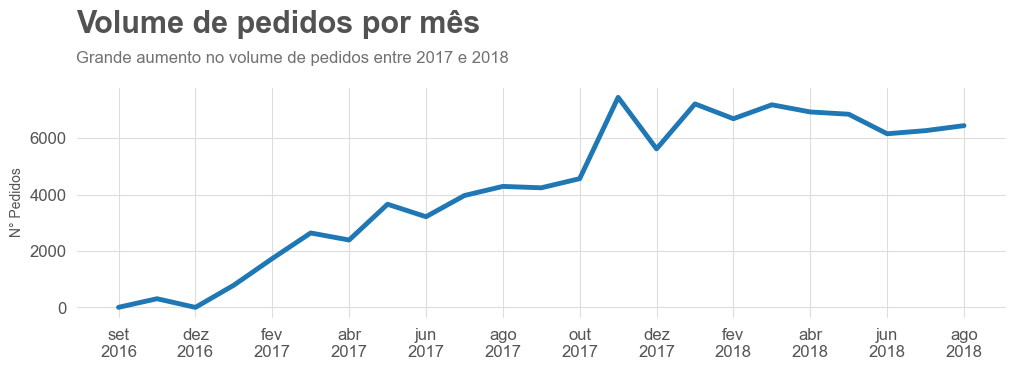

In [104]:
# plotar volume de pedidos por mês
# ignorar o último mês de 2018 pois tem apenas 1 exemplo
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(orders_volume[:-1].date.dt.strftime('%b\n%Y'), orders_volume[:-1].volume, linewidth=3.5)

# configurar plot
ax.annotate(
    'Volume de pedidos por mês',
    xy=(0, 0),
    xytext=(0, 285),
    xycoords='axes pixels',
    fontsize=22,
    fontweight='bold',
    color='#525252')

ax.annotate(
    'Grande aumento no volume de pedidos entre 2017 e 2018',
    xy=(0, 0),
    xytext=(0, 255),
    xycoords='axes pixels',
    fontsize=12,
    color='#727272')

ax.xaxis.grid(color='#DDD')
ax.yaxis.grid(color='#DDD')
ax.set_facecolor('#FFF')

ax.set_ylabel('N° Pedidos', fontsize=10, color='#555')
ax.xaxis.set_tick_params(labelsize=12, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=12, labelcolor='#555')

ax.set_xticks(ax.get_xticks()[::2])

plt.show()

O gráfico acima mostra crescimento considerável no volume de pedidos a cada mês entre 2017 e 2018, com uma estabilização do volume em 2018 em uma faixa acima de 6000 pedidos por mês (não é o valor real, pois é apenas uma amostra aleatória, mas pode-se inferir que esse comportamento de estabilização se reflete nos dados de população se os dados são bem representativos).

Com uma pesquisa rápida no google descobri que a empresa Olist foi criada no ano de 2015, portanto o gráfico acima pode estar demostrando o crescimento da empresa em números de vendedores utilizando o serviço da Olist.

Outra hipótese é que não houve um crescimento significativo no número de vendedores mas os produtos começaram a ser mais vendidos.

Para tirar a dúvida irei analisar a quantidade de vendedores diferentes que tiveram algum pedido registrados a cada mês, caso a quantidade aumente significativamente com os meses é provável que a segunda hipótese seja falsa — mas não excluindo a possibilidade que a plataforma Olist promoveu um aumento na comercialização dos produtos dos vendedores.

#### **Número de vendedores diferentes por mês**

Ao analisar o número de vendedores diferentes que possuem algum pedido registrado por mês estou querendo saber se a empresa Olist teve novos clientes utilizando seus serviços e desta forma encontrar uma possível justificativa para o aumento no volume de pedidos por mês.

In [35]:
# criar tabela com seller_id e order_purchase_timestamp
df_sellers_per_purchase_timestamp = df_clean[['seller_id', 'order_purchase_timestamp']].copy()

# manter apenas mês e ano da compra
df_sellers_per_purchase_timestamp.order_purchase_timestamp = df_sellers_per_purchase_timestamp.order_purchase_timestamp.dt.to_period('M')

# remover duplicatas
df_sellers_per_purchase_timestamp.drop_duplicates(inplace=True)

In [36]:
# calcular quantidade de vendedores diferentes por mês
sellers_count_per_month = df_sellers_per_purchase_timestamp.groupby(['order_purchase_timestamp'], as_index=False).size()
sellers_count_per_month.columns = ['date', 'qty']

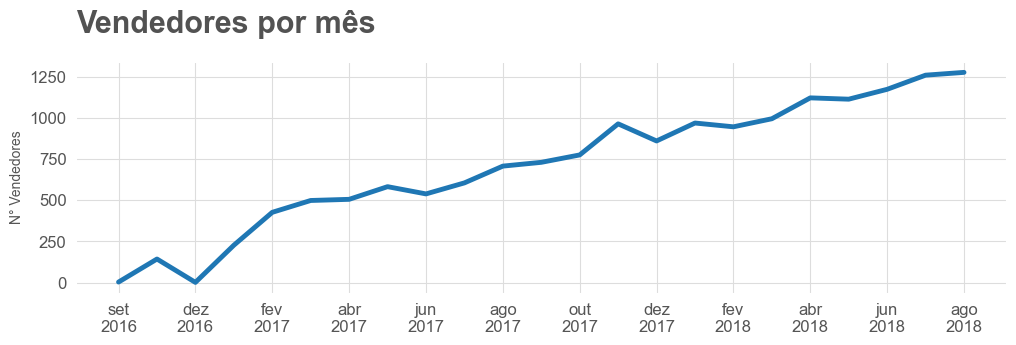

In [105]:
# plotar quantidade de vendedores únicos por mês
# ignorar o último mês de 2018 pois tem apenas 1 exemplo
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(sellers_count_per_month[:-1].date.dt.strftime('%b\n%Y'), sellers_count_per_month[:-1].qty, linewidth=3.5)

# configurar plot
ax.annotate(
    'Vendedores por mês',
    xy=(0, 0),
    xytext=(0, 260),
    xycoords='axes pixels',
    fontsize=22,
    fontweight='bold',
    color='#525252')

ax.xaxis.grid(color='#DDD')
ax.yaxis.grid(color='#DDD')
ax.set_facecolor('#FFF')

ax.set_ylabel('N° Vendedores', fontsize=10, color='#555')
ax.xaxis.set_tick_params(labelsize=12, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=12, labelcolor='#555')

ax.set_xticks(ax.get_xticks()[::2])

plt.show()

O gráfico acima aponta um crescimento de 5 vezes no número de vendedores únicos de janeiro de 2017 a julho de 2018. Ou seja, se estes dados são representativos da populaçao, a Olist realmete teve um crescimento de clientes significativo o que justifica o aumento no volume de pedidos mensais. Isto também indica uma demanda crescente dos serviços fornecidos pela empresa.

#### **Volume de receita mensal por produto**

Até agora, observei um crescimento considerável na relevância da Olist, com isso, outro ponto interessante para se observar é o volume de receita mensal levantado pela venda dos produtos.

A Olist possui um sistema de planos onde é fornecido recursos diferentes e cobrado comissões diferentes. Os dois planos mais básicos, são o "Crescer", que cobra 23% de comissão, e "Evoluir", que cobra 21% de comissão (isto para valores atuais de 2024). Dessa comissão, **18% é destinada às plataformas onde o produto é anunciado** e entre **3% e 5% para a Olist**.

Como as informações sobre plano do vendedor não estão presentes nos dados, eu irei estimar a receita aproximada por produto que a Olist obteve por meio de comissão. Para isso, vou considerar a comissão da Olist em torno de 4% por produto com uma margem de erro de 1% (para cima ou para baixo). Além disso, ressalto que estes valores são baseados em 2024, o que pode ser bem diferente da época em que os dados foram coletados, mesmo assim, é uma boa base para fazer uma estimação de receita.

Apenas mais uma observação: eu não irei considerar o valor do frete nos cálculos, pois onde o frete é igual a R$ 0,00, o frete foi dividido entre a Olist e o vendedor (por isso não foi cobrado do cliente).

In [38]:
# criar tabela com total_product_price e order_purchase_timestamp
df_revenue_per_purchase_time = df_clean[['total_product_price', 'order_purchase_timestamp']].copy()

# manter apenas mês e ano da compra
df_revenue_per_purchase_time.order_purchase_timestamp = df_revenue_per_purchase_time.order_purchase_timestamp.dt.to_period('M')

In [39]:
# calcular receita por mês e ano
revenue_volume = df_revenue_per_purchase_time.groupby(['order_purchase_timestamp'], as_index=False).agg({'total_product_price' : 'sum'})
revenue_volume.rename({'order_purchase_timestamp' : 'date', 'total_product_price' : 'revenue'}, axis=1, inplace=True)

In [40]:
# calcular comissão dos marketplaces e da olist
marketplace_commission = revenue_volume.revenue * 0.18
olist_commission = revenue_volume.revenue * 0.04

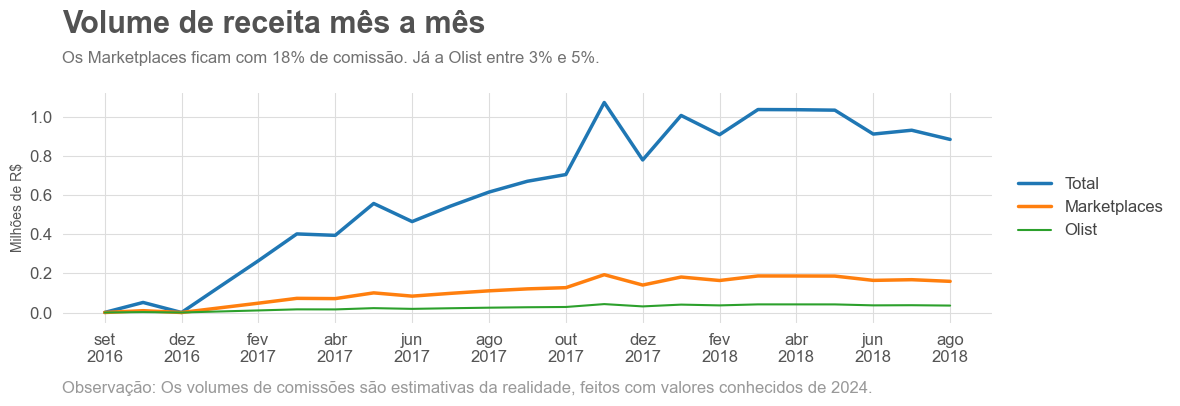

In [122]:
# plotar volume de receita por mês
# ignorar o último mês de 2018 pois tem apenas 1 exemplo
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(revenue_volume[:-1].date.dt.strftime('%b\n%Y'), revenue_volume[:-1].revenue / (10 ** 6), linewidth=2.5, label='Total')
ax.plot(revenue_volume[:-1].date.dt.strftime('%b\n%Y'), marketplace_commission[:-1] / (10 ** 6), linewidth=2.5, label='Marketplaces')
ax.plot(revenue_volume[:-1].date.dt.strftime('%b\n%Y'), olist_commission[:-1] / (10 ** 6), linewidth=1.5, label='Olist')

# configurar plot
ax.annotate(
    'Volume de receita mês a mês',
    xy=(0, 0),
    xytext=(0, 290),
    xycoords='axes pixels',
    fontsize=22,
    fontweight='bold',
    color='#525252')

ax.annotate(
    'Os Marketplaces ficam com 18% de comissão. Já a Olist entre 3% e 5%.',
    xy=(0, 0),
    xytext=(0, 260),
    xycoords='axes pixels',
    fontsize=12,
    color='#727272')

ax.annotate(
    'Observação: Os volumes de comissões são estimativas da realidade, feitos com valores conhecidos de 2024.',
    xy=(0, 0),
    xytext=(0, -70),
    xycoords='axes pixels',
    fontsize=12,
    color='#999')

ax.xaxis.grid(color='#DDD')
ax.yaxis.grid(color='#DDD')
ax.set_facecolor('#FFF')

ax.set_ylabel('Milhões de R$', fontsize=10, color='#555')
ax.xaxis.set_tick_params(labelsize=12, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=12, labelcolor='#555')

ax.set_xticks(ax.get_xticks()[::2])

ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, fontsize=12, labelcolor='#444')

plt.show()

* Mesmo o volume de receita ter aumentado para próximo dos R$ 1 milhão, a receita que a Olist obtém a partir das comissões das vendas dos produtos não chega nem perto disso.

* Os marketplaces conseguem uma fatia bem maior que a Olist, chegando aos R$ 200 mil por mês apenas de comissão.

* Vale considerar, que a Olist não obtém lucro apenas das comissões. Ela também cobra por seus tipos de plano, que possuem valor mensal. Contudo, não tenho como estimar esta informação já que os preços entre os planos variam muito entre si.

### **Variáveis qualitativas**

#### **Status dos pedidos**

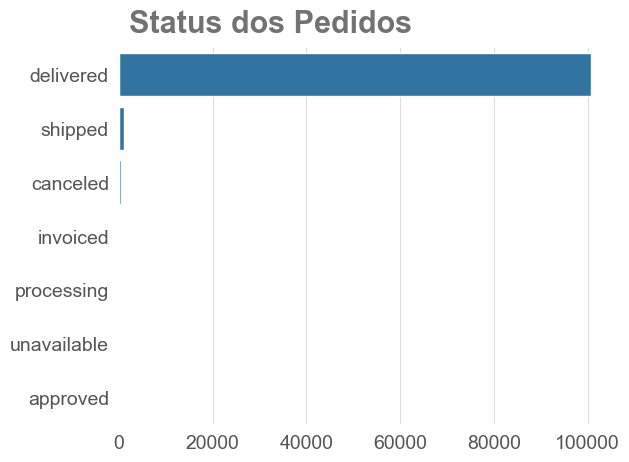

In [42]:
# calcular quantidade para cada estado de order_status
order_status_counts = df_clean.order_status.value_counts()

# plotar gráfico de barra
ax = sns.barplot(order_status_counts, orient='h')

# configurar plot
ax.annotate('Status dos Pedidos',
            xy=(0, 0),
            xytext=(10, 392),
            textcoords='axes pixels',
            fontsize=22,
            fontweight='bold',
            color='#727272')

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.grid(color='#DDD')
ax.yaxis.grid(visible=False)
ax.set_facecolor('#FFF')

ax.xaxis.set_tick_params(labelsize=14, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=14, labelcolor='#555')

plt.tight_layout()

Os pedidos assumem 7 estados possíveis:

* **delivered**: entregue

* **shipped**: enviado

* **canceled**: cancelado

* **invoiced**: faturado (venda confirmada e Nota Fiscal emitida)

* **processing**: processando

* **unavailable**: indisponível

* **approved**: aprovado

Em geral, a maioria dos pedidos foram entregues.

#### **Avaliações dos pedidos**

In [43]:
# calcular e mostrar média de review score geral
print('Média de score:', round(df_clean.review_score.mean(), 2))

Média de score: 4.08


[ 05-14-2024 01:50:50 PM ] 223 category.py - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[ 05-14-2024 01:50:50 PM ] 223 category.py - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


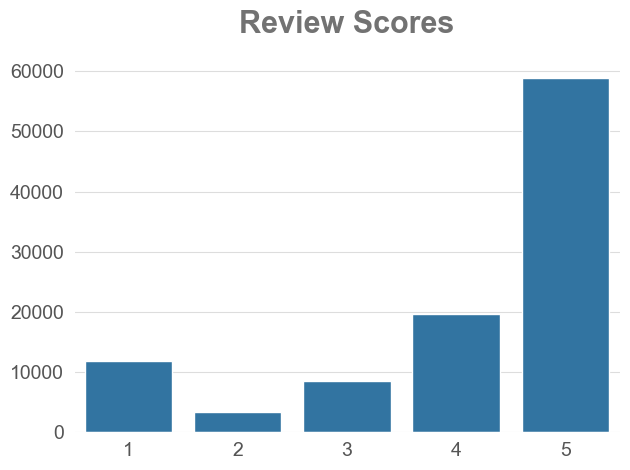

In [44]:
# calcular quantidade para cada review score
review_scores_counts = df_clean.review_score.value_counts()
review_scores_counts.index = [int(idx) for idx in review_scores_counts.index]

# plotar gráfico de barra
ax = sns.barplot(review_scores_counts, orient='v')

# configurar plot
ax.set_title('Review Scores', pad=20, fontsize=22, fontweight='bold', color='#727272')

ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.grid(color='#DDD')
ax.xaxis.grid(visible=False)
ax.set_facecolor('#FFF')

ax.xaxis.set_tick_params(labelsize=14, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=14, labelcolor='#555')

plt.tight_layout()

**Insights**

* A maioria das avaliações é positiva (entre 4 e 5 pontos) com uma avaliação média de 4.08, ou seja, na maioria dos pedidos os clientes se sentem bem satisfeitos.

* Pedidos avaliados em 1 ponto (pior avaliação possível), ocorre em maior frequência que avaliações de 2 e 3 pontos.

Vou considerar que os scores de 1 a 3 indicam algum nível de insatisfação e analisar como estes scores variam a cada mês.

In [45]:
# agrupar as reviews scores por order_id e data de compra
scores_per_purchase_timestamp = df_clean[['order_id', 'review_score', 'review_answer_timestamp']].copy()

# manter apenas mês e ano
scores_per_purchase_timestamp.review_answer_timestamp = scores_per_purchase_timestamp.review_answer_timestamp.dt.to_period('M')

# remover duplicatas
scores_per_purchase_timestamp.drop_duplicates(inplace=True)

In [46]:
# filtrar apenas as reviews com scores de 1 a 3
bad_scores = scores_per_purchase_timestamp[scores_per_purchase_timestamp.review_score.isin([1, 2, 3])]

In [47]:
# separar a quantidade de scores por mês
bad_scores_per_month = bad_scores.groupby(['review_score', 'review_answer_timestamp']).size().unstack()
bad_scores_per_month.fillna(1, inplace=True)

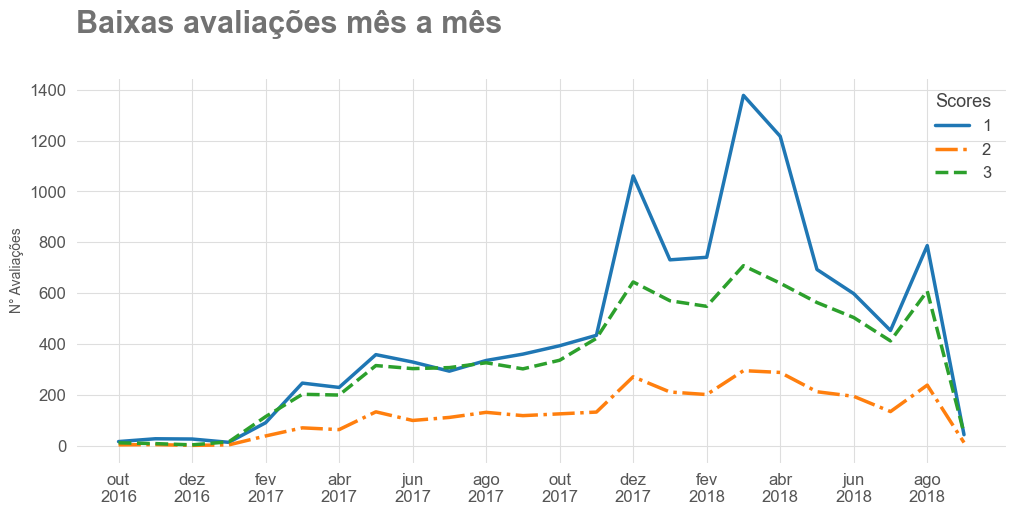

In [124]:
# plotar quantidade de scores por mês
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    bad_scores_per_month.iloc[0].index.to_series()[:-1].dt.strftime('%b\n%Y'),
    bad_scores_per_month.iloc[0][:-1],
    label='1',
    linewidth=2.5)

ax.plot(
    bad_scores_per_month.iloc[1].index.to_series()[:-1].dt.strftime('%b\n%Y'),
    bad_scores_per_month.iloc[1][:-1],
    label='2',
    linewidth=2.5, linestyle='-.')

ax.plot(
    bad_scores_per_month.iloc[2].index.to_series()[:-1].dt.strftime('%b\n%Y'),
    bad_scores_per_month.iloc[2][:-1],
    label='3',
    linewidth=2.5, linestyle='--')

# configurar plot
ax.annotate('Baixas avaliações mês a mês',
            xy=(0, 0),
            xytext=(0, 430),
            xycoords='axes pixels',
            fontsize=22,
            fontweight='bold',
            color='#727272')

ax.xaxis.grid(color='#DEDEDE')
ax.yaxis.grid(color='#DEDEDE')
ax.set_facecolor('#FFF')

ax.set_ylabel('N° Avaliações', fontsize=10, color='#555')
ax.xaxis.set_tick_params(labelsize=12, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=12, labelcolor='#555')

ax.set_xticks(ax.get_xticks()[::2])

legend = ax.legend(title='Scores', frameon=False, title_fontsize=13, fontsize=12, labelcolor='#444')
legend.get_title().set_color('#444')

plt.show()

* Com o aumento do número de pedidos, as avaliações baixas também aumentaram.

* Inicialmente (até novembro de 2017) o aumento ocorreu de forma amena e aproximadamente linear.

* Apartir de dezembro de 2017 houve um aumento substancial nas avaliações baixas.

Com a análise das reviews (que farei posteriormente), pretendo encontrar algum motivo em comum para essas avaliações.

#### **Categoria dos produtos**

In [49]:
# descrição geral de product_category_name
df_clean.product_category_name.describe()

count              101552
unique                 73
top       cama_mesa_banho
freq                10289
Name: product_category_name, dtype: object

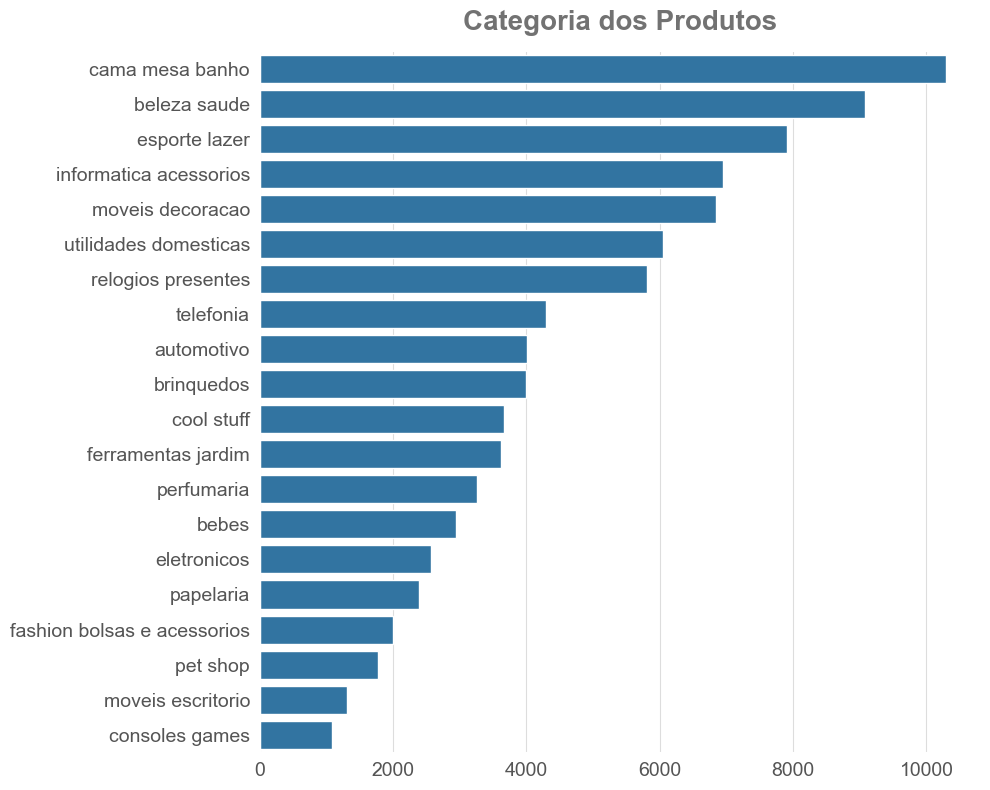

In [50]:
# calcular quantidade de cada categoria (apenas 20 primeiros)
product_category_counts = df_clean.product_category_name.value_counts()[:20].copy()

# remover os '_' dos nomes das categorias
product_category_counts.index = [i.replace('_', ' ') for i in product_category_counts.index]

# plotar gráfico de barra
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(product_category_counts, orient='h', ax=ax)

# configurar plot
ax.set_title('Categoria dos Produtos', pad=15, fontsize=20, fontweight='bold', color='#727272')

ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.grid(color='#DDD')
ax.yaxis.grid(visible=False)
ax.set_facecolor('#FFF')

ax.xaxis.set_tick_params(labelsize=14, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=14, labelcolor='#555')

plt.tight_layout()

Existem ao todo 73 categorias diferentes de produto (plotei apenas 20), e as 10 categorias que mais se destacam são:

* cama_mesa_banho

* beleza_saude

* esporte_lazer

* informatica_acessorios

* moveis_decoracao

* utilidades_domesticas

* relogios_presentes

* telefonia

* automotivo

* brinquedos

Em geral, observa-se uma maior quantidade de pedidos para itens domésticos ou relacionados a saúde e beleza.

#### **Localidade dos clientes e vendedores**

In [51]:
# contar vendedores por estado
customers_states_counts = df_clean.loc[df_clean.customer_unique_id.drop_duplicates().index].\
                        customer_state.value_counts().reset_index()

customers_states_counts.columns = ['state', 'count']

# contar clientes por estado
sellers_states_counts = df_clean.loc[df_clean.seller_id.drop_duplicates().index].\
                        seller_state.value_counts().reset_index()

sellers_states_counts.columns = ['state', 'count']

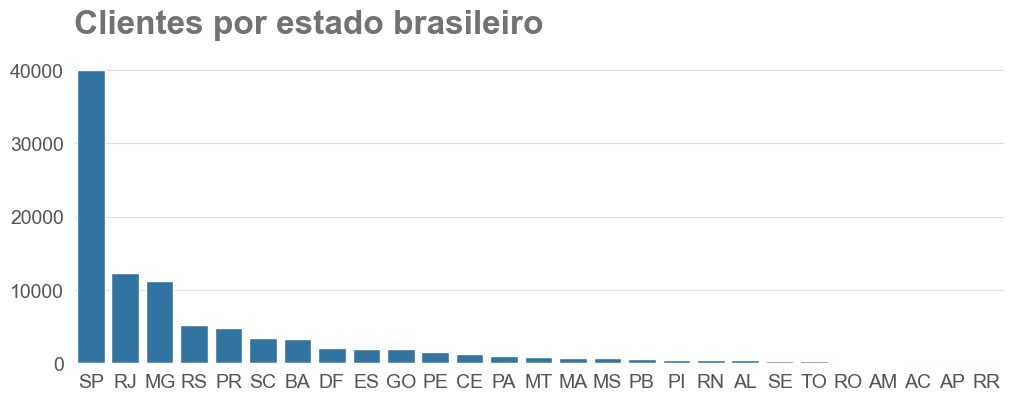

In [52]:
# plotar gráfico de barras para contagem de clientes
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(customers_states_counts, x='state', y='count', ax=ax)

# configurar plot
ax.annotate('Clientes por estado brasileiro',
            xy=(0, 0),
            xytext=(0, 330),
            textcoords='axes pixels',
            fontsize=24,
            fontweight='bold',
            color='#727272')

ax.set_ylabel('')
ax.set_xlabel('')
ax.yaxis.grid(color='#DDD')
ax.xaxis.grid(visible=False)
ax.set_facecolor('#FFF')

ax.xaxis.set_tick_params(labelsize=14, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=14, labelcolor='#555')

plt.show()

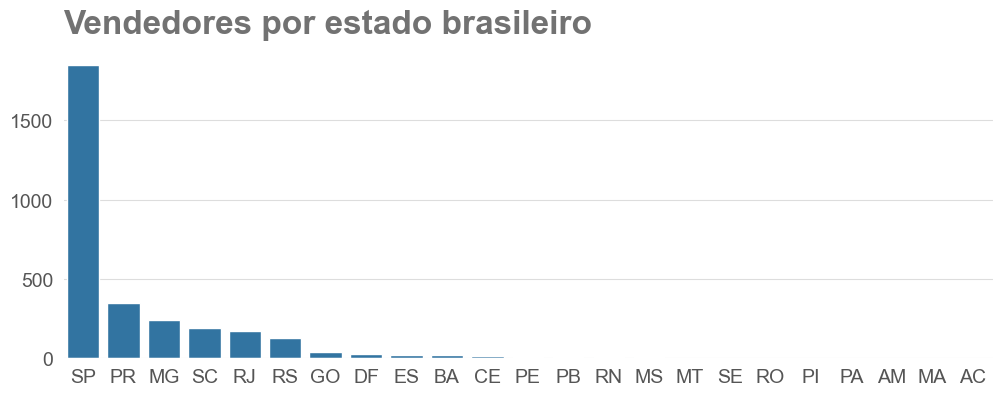

In [53]:
# plotar gráfico de barras para contagem de vendedores
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(sellers_states_counts, x='state', y='count', ax=ax)

# configurar plot
ax.annotate('Vendedores por estado brasileiro',
            xy=(0, 0),
            xytext=(0, 325),
            textcoords='axes pixels',
            fontsize=24,
            fontweight='bold',
            color='#727272')

ax.set_ylabel('')
ax.set_xlabel('')
ax.yaxis.grid(color='#DDD')
ax.xaxis.grid(visible=False)
ax.set_facecolor('#FFF')

ax.xaxis.set_tick_params(labelsize=14, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=14, labelcolor='#555')

plt.show()

**Insights**

* Os vendedores e clientes são majoriatriamente de São Paulo.

* Os cinco estados com mais clientes e vendedores são: São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do sul, Paraná e Santa Catarina.

### **Analisando reviews escritas**

Reviews podem afetar a decisão dos clientes em comprar ou não determinado produto. Um grande número de reclamações podem afetar a imagem do produto, fazendo com que as pessoas busquem por outros vendedores. Portanto, irei efetuar uma análise das reviews, tentando buscar algum insight que possa ser usado a favor dos vendedores.

Para isso, nesta etapa eu pretendo:

* Tokenizar as reviews, com o modelo portugûes do spaCy.

* Normalizar os textos.

* Criar wordclouds dos textos para cada review_score, para extrair algum insight.

* Utilizar um modelo de aprendizado não supervisionado para tentar dividir as reviews em categorias mais específicas — como diferenciar quando o comentário é a respeito do produto, da loja ou té mesmo da entrega (se for possível).

#### **Tokenizar reviews**

Primeiramente eu preciso separar os comentários, e como cada review é composta de título e mensagem, eu irei unir o título e a mensagem em uma única variável.

In [54]:
# carregar spacy (modelo português)
nlp = spacy.load('pt_core_news_md')

In [55]:
# unir título e mensagem
reviews = df_clean.review_comment_title + '. ' + df_clean.review_comment_message
scores = df_clean.review_score

# remover valores nulos
reviews.dropna(inplace=True)

# remover duplicatas
reviews.drop_duplicates(inplace=True)

# atualizar scores
scores = scores[reviews.index]

In [56]:
# tokenizar reviews
reviews_docs = [doc for doc in nlp.pipe(reviews)]

In [57]:
# mostrar quantidade de reviews
len(reviews_docs)

9532

#### **Normalizar reviews**

Para normalizar as reviews, irei aplicar as seguintes transformações nos dados:

* Remover qualquer coisa que não sejam letras (informações irrelevantes).

* Remover stopwords, exceto algumas como a palavra 'não', que podem ser úteis na análise.

* Transformar todas a letras para minúsculas.

Primeiro eu irei selecionar algumas stopwords para não descartar, como a palavra 'não'. O critério é manter o máximo do significado das reviews, por exemplo, considerando as frase:

- O produto é bom.
- O produto não é bom.

Caso descarta-se 'não' as duas frases teriam o mesmo sentido: 'O produto é bom', o que está errado.

In [58]:
# mostar stop words para portugûes
print(STOP_WORDS)

{'tanto', 'tiveram', 'estivestes', 'relação', 'vosso', 'baixo', 'segunda', 'iniciar', 'põe', 'desde', 'apoio', 'além', 'quem', 'quinta', 'apoia', 'esse', 'duas', 'meses', 'aquilo', 'diz', 'fazia', 'geral', 'eu', 'oitava', 'isto', 'treze', 'dizer', 'longe', 'coisa', 'como', 'grupo', 'fazes', 'quero', 'nova', 'do', 'pontos', 'nuns', 'conhecida', 'porque', 'tentar', 'dizem', 'fazeis', 'deste', 'grandes', 'nessa', 'tivemos', 'segundo', 'sob', 'oito', 'estiveste', 'um', 'dez', 'foste', 'quais', 'o', 'tais', 'aquele', 'cá', 'estão', 'vêm', 'questão', 'toda', 'cedo', 'outros', 'comprido', 'obrigado', 'onze', 'dão', 'ademais', 'vezes', 'ambas', 'dezassete', 'estes', 'sou', 'estou', 'apenas', 'esteve', 'doze', 'nossos', 'pouco', 'somente', 'está', 'ela', 'momento', 'diante', 'parece', 'acerca', 'vinda', 'num', 'naquela', 'deverá', 'grande', 'nesse', 'somos', 'tive', 'valor', 'poder', 'quarto', 'seria', 'sétimo', 'ao', 'lá', 'as', 'daquele', 'último', 'até', 'foi', 'estás', 'fazer', 'não', 'essa

Após analisar as stopwords a cima, as palavras que acho poderem afetar o sentido de algumas frases são: 'não', 'nem', 'sem', 'nada', 'nenhuma', 'falta', 'pouca' e 'nunca'.

In [59]:
ignore_stop_words_list = [ 'não', 'nem', 'sem', 'nada', 'nehuma', 'falta', 'pouca', 'nunca' ]

In [60]:
def process_doc(doc: Doc) -> Doc:
    '''
    função auxiliar para normalizar o texto contido no documento.
    '''
    # atualizar stopwords
    stopwords = STOP_WORDS - set(ignore_stop_words_list)

    words = []
    spaces = []
    for token in doc:
        # ignorar stop words
        if token.lower_ in stopwords:
            continue

        # ignorar substantivos
        if token.pos_ in ['PROPN']:
            continue

        # considerar apenas palavras com letras (ignora números, por exemplo, no meio de palavras)
        if not token.is_alpha:
            continue

        # ignorar palavras muito repetidas
        if token.lower_ in ['produto', 'produtos', 'recomendo', 'loja', 'ótimo']:
            continue

        words.append(token.lemma_.lower())
        spaces.append(True)

    # remover último espaço
    if len(spaces) > 0:
        spaces[-1] = False
        
    # retonar documento com os textos processados
    return Doc(nlp.vocab, words, spaces)

In [61]:
# limpar reviews
reviews_docs_clean = [process_doc(doc) for doc in reviews_docs]

# descartar reviews vazias após limpeza
reviews_docs_clean = [doc for doc in reviews_docs_clean if len(doc) > 0]

#### **WordClouds das reviews**

O objetivo de visualizar word clouds das diferentes reviews, é compreender quais são as reclamações e/ou pontos positivos mais comuns para cada avaliação de score (1, 2, 3, 4, e 5). Com isso eu posso posteriormente focar em encontrar problemas de forma automatizada apenas para as reviews com maior probabilidade de conter alguma reclamação.

In [62]:
# agrupar reviews pelo score
reviews_docs_score_1 = [ doc for i, doc in enumerate(reviews_docs_clean) if scores.loc[reviews.index[i]] == 1]
reviews_docs_score_2 = [ doc for i, doc in enumerate(reviews_docs_clean) if scores.loc[reviews.index[i]] == 2]
reviews_docs_score_3 = [ doc for i, doc in enumerate(reviews_docs_clean) if scores.loc[reviews.index[i]] == 3]
reviews_docs_score_4 = [ doc for i, doc in enumerate(reviews_docs_clean) if scores.loc[reviews.index[i]] == 4]
reviews_docs_score_5 = [ doc for i, doc in enumerate(reviews_docs_clean) if scores.loc[reviews.index[i]] == 5]

In [63]:
print('Reviews com score 1:', len(reviews_docs_score_1))
print('Reviews com score 2:', len(reviews_docs_score_2))
print('Reviews com score 3:', len(reviews_docs_score_3))
print('Reviews com score 4:', len(reviews_docs_score_4))
print('Reviews com score 5:', len(reviews_docs_score_5))

Reviews com score 1: 1665
Reviews com score 2: 430
Reviews com score 3: 687
Reviews com score 4: 1344
Reviews com score 5: 5035


In [64]:
def display_word_cloud_from_docs(docs):
    '''
    função auxiliar para mostar um wordcloud apartir dos spacy docs.
    '''

    # criar word cloud
    word_cloud = WordCloud(
        background_color='white',
        width=1600, height=800,
        random_state=42
    ).generate(' '.join([doc.text for doc in docs]))

    # plot word cloud
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.show()

##### **Reviews com score 1**

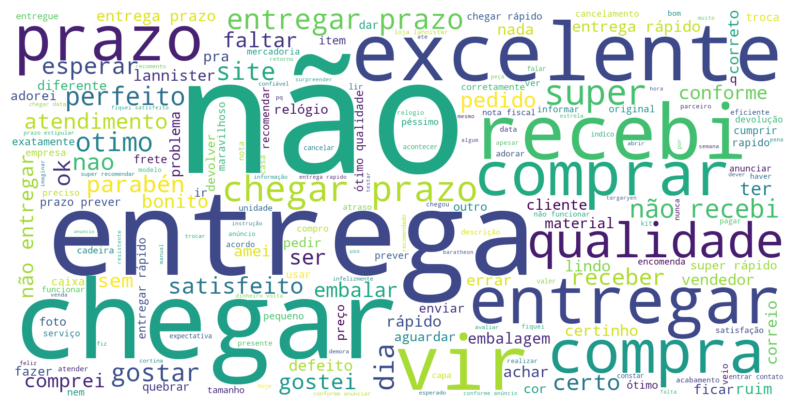

In [65]:
display_word_cloud_from_docs(reviews_docs_score_1)

##### **Reviews com score 2**

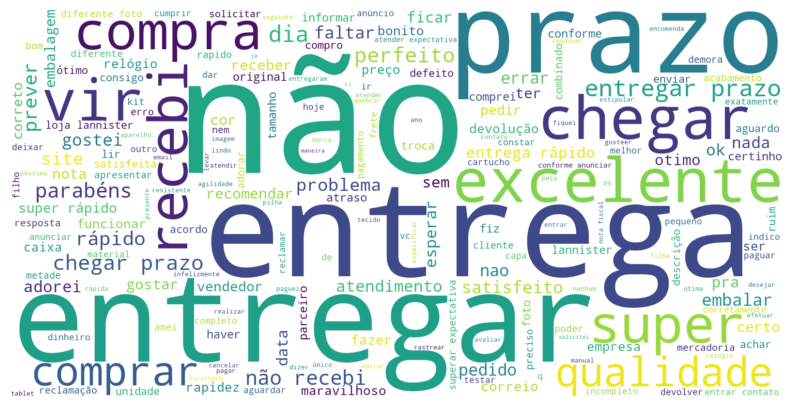

In [66]:
display_word_cloud_from_docs(reviews_docs_score_2)

##### **Reviews com score 3**

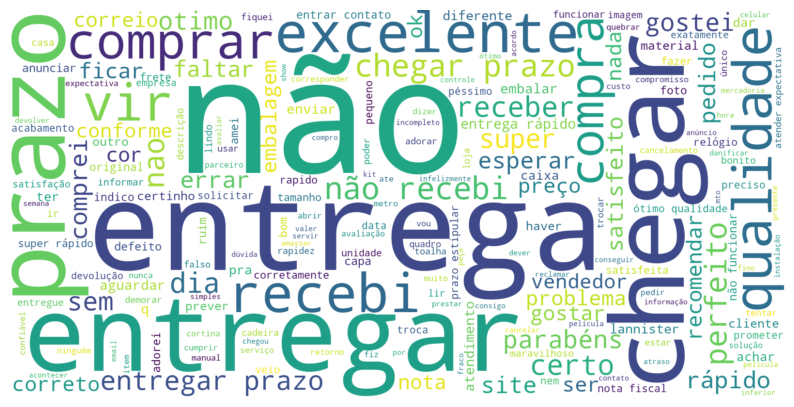

In [67]:
display_word_cloud_from_docs(reviews_docs_score_3)

##### **Reviews com score 4**

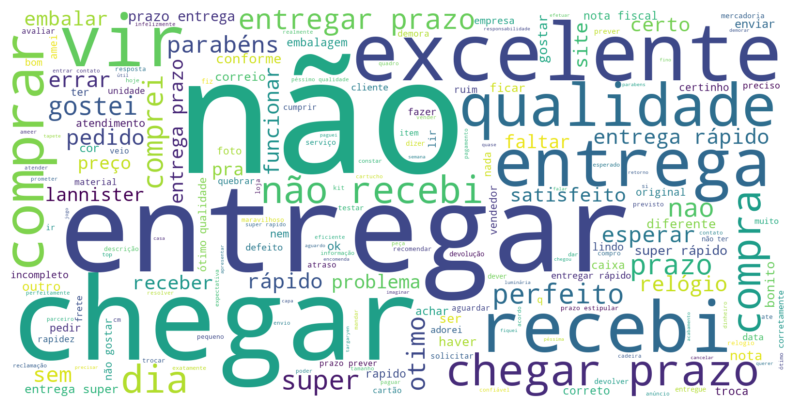

In [68]:
display_word_cloud_from_docs(reviews_docs_score_4)

##### **Reviews com score 5**

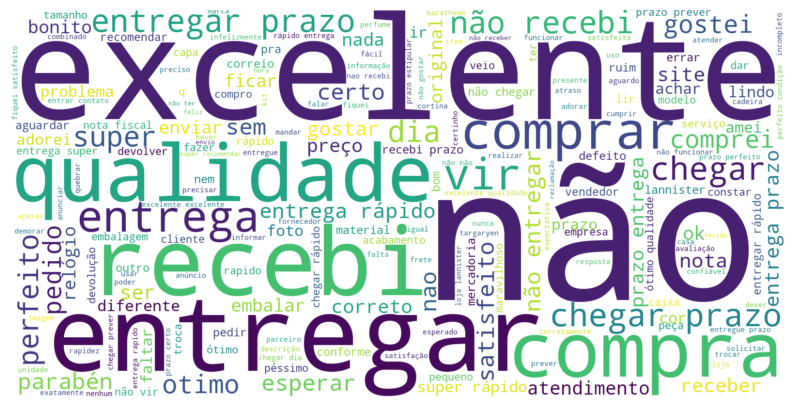

In [69]:
display_word_cloud_from_docs(reviews_docs_score_5)

**Insights**

* Para as reviews com **score de 1 a 3**, há reclamações como: **'não entregar'**, **'quebrar'**, **'defeito'**, **'péssimo'**, **'devolução'**, **'atraso'**, **'reclamação'**, **'ruim'**, **'falso'** e **'problema'**, entre outros.

* Para as reviews com score 4 e 5 as reviews demostram mais satisfação dos clientes. Mas ainda há uma ou outra reclamação.

Com isso, eu irei focar nas reviews com score de 1 a 3 para realizar uma segmentação nas reviews que ajudem a extrair problemas comuns de forma automatizada. No entanto, isto será feito no notebook 03_1, para não poluir o notebook atual.

#### **Segmentação das reviews**

No notebook 03_1, eu cheguei a um modelo que conseguiu detectar dois tópicos recorrentes nas reviews: Produto e Entrega.

**Tópico Produto:**

Relacionado em grande parte a reclamações de qualidade e características do produto.

**Tópico Entrega:** 

Relacionado a produtos com entrega atrazadas, ou que não foram entregues ou, ainda, que foram entregues parcialmente.


Meu objetivo agora, é aplicar este modelo a todas as reviews com score menor ou igual a 2 (motivo explicado no notebook 03_1), para analizar as quantidades de reclamações em cada um desses tópicos no decorrer do tempo.

In [70]:
# carregar preprocessador de reviews e o modelo para classifica-las
preprocessor = load_object(Path('..') / LDA_PREPROCESSOR_PATH)
model = load_object(Path('..') / LDA_MODEL_PATH)

In [71]:
def classify_reviews_in_topics(reviews):
    '''
    Função auxiliar para classificar as reviews nos tópicos corretos
    '''
    prepared_reviews = preprocessor.transform(reviews)
    reviews_topics = model.transform(prepared_reviews)

    reviews_df = {
        'review' : [],
        'topic' : [],
    }

    for i, percentages in enumerate(reviews_topics):
        reviews_df['review'].append(reviews.iloc[i])

        # reviews inconclusivas não possuem representação vetorial
        # ou ainda, a diferenças de porcentagens entre um tópico e outro é menor que o threshold de 0.15 (ver notebook 03_1)
        if prepared_reviews[i].sum() == 0 or np.abs(percentages[0] - percentages[1]) <= 0.15:
            reviews_df['topic'].append('Inconclusivo')
        elif percentages[0] > percentages[1]:
            reviews_df['topic'].append('Produto')
        else:
            reviews_df['topic'].append('Entrega')

    return pd.DataFrame(reviews_df)

In [126]:
# classificar as reviews
bad_reviews = reviews[scores[scores <= 2].index]
reviews_topics = classify_reviews_in_topics(bad_reviews)

In [127]:
# adicionar a data das reviews
reviews_topics['time'] = df_clean.iloc[bad_reviews.index].review_answer_timestamp.dt.to_period('M').values

In [128]:
# contar os tópicos por mês
topics_count_per_month = reviews_topics.groupby(['topic', 'time'])\
                        .size().unstack().fillna(0).drop('Inconclusivo', axis=0).T.reset_index()

topics_count_per_month.time = topics_count_per_month.time.dt.strftime('%b %Y')

topics_count_per_month = pd.melt(topics_count_per_month, id_vars=['time']).rename(columns={'value' : 'count'})

In [130]:
# penalizar contagens em 10% (motivo em notebook 03_1)
topics_count_per_month['count'] = (topics_count_per_month['count'] * 0.9).astype(int)

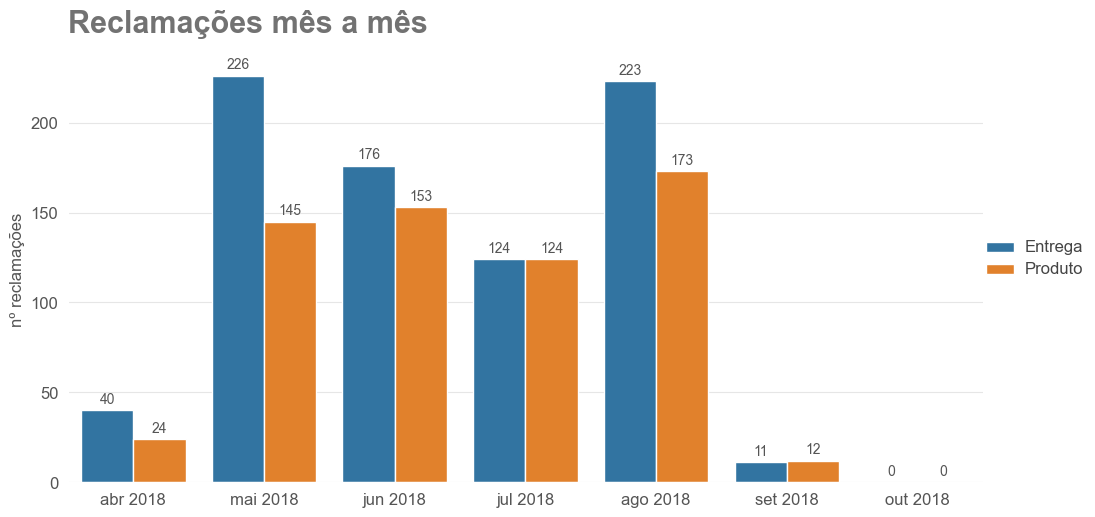

In [131]:
# plotar quantidade de reclamações em tópicos por mês
g = sns.catplot(
    topics_count_per_month, kind='bar',
    x='time', y='count', hue='topic',
    height=5, aspect=2
)

# configurar plot
g.legend.set_title('')
g.legend.get_texts()[0].set_fontsize(12)
g.legend.get_texts()[0].set_color('#444')
g.legend.get_texts()[1].set_fontsize(12)
g.legend.get_texts()[1].set_color('#444')

ax = g.facet_axis(0, 0)
ax.set_ylabel('nº reclamações', fontsize=12, color='#555')
ax.set_xlabel('')

ax.set_facecolor('#FFF')
ax.yaxis.grid(color='#E6E6E6')
ax.xaxis.set_tick_params(labelsize=12, labelcolor='#555')
ax.yaxis.set_tick_params(labelsize=12, labelcolor='#555')

ax.annotate('Reclamações mês a mês',
            xy=(0, 0),
            xytext=(0,450),
            xycoords='axes pixels',
            fontsize=22,
            fontweight='bold',
            color='#727272')

# anotar as contagens em cada barra
for c in ax.containers:
    labels = [int(v.get_height()) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, color='#555')

plt.show()

**Insights**

* No gráfico acima notamos que as reclamações (com reviews), começam a aparecer em abril de 2018 e seguem em grandes quantidades nos meses seguintes. 

* O início e fim do gráfico mostram baixas quantidades de reclamações, o que possívelmente seja devido aos dados serem uma amostra. Por isso, é mais confiável considerar os valores entre maio e agosto, onde os valores tem menor variação entre eles.

* Em geral há mais reclamações relacionadas à entrega.

* A diferença entre a quantidade de reclamações de entrega e produtos não chega a ser enorme.

## **Análise estatística bivariada**

Agora irei analizar as variáveis em conjuntos, em especial as relacionadas a datas.

### **Tempo de entrega**

Em minha análise de reviews percebi várias reclamações de entregas demoradas ou que não chegaram. Esta questão pode prejudicar muito a imagem do anunciante fazendo com que seus produtos sejam menos comercializados.

Por tanto, irei analisar a relação entre o tempo estimado e o tempo real de entrega.

In [139]:
['asd', 'asd'] + ['asdasd']

['asd', 'asd', 'asdasd']

In [146]:
# separar as variáveis com data
date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
renamed_columns = ['purchase_date', 'customer_date', 'estimated_date']

# separar os pedidos que foram entregues
df_delivered = df_clean.loc[df_clean.order_status == 'delivered', ['order_id'] + date_columns]
df_delivered.columns = ['order_id'] + renamed_columns

# remover duplicatas de order_id
df_delivered.drop_duplicates(subset=['order_id'], inplace=True)

# remover coluna order_id
df_delivered.drop('order_id', axis=1, inplace=True)

In [147]:
df_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96472 entries, 0 to 103026
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   purchase_date   96472 non-null  datetime64[ns]
 1   customer_date   96464 non-null  datetime64[ns]
 2   estimated_date  96472 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.9 MB


Alguns pedidos não possuem valores registrados para data de postagem e entrega ao cliente (mesmo já tendo sido entregues). Como são poucos valores nesta situação, irei discartá-los.

In [149]:
# dropar linhas com valores nulos
df_delivered.dropna(axis=0, inplace=True)

#### **Tempo real de entrega**

Os pedidos levam 12 dias em média para chegarem até os clientes.

In [150]:
# calcular o tempo real da entrega
(df_delivered.customer_date - df_delivered.purchase_date).dt.days.describe()

count    96464.000000
mean        12.093683
std          9.551620
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
dtype: float64

#### **Tempo estimado de entrega**

O tempo estimado para o produto chegar ao cliente é de 23 dias em média.

In [151]:
# calcular tempo estimado para entrega
(df_delivered.estimated_date - df_delivered.purchase_date).dt.days.describe()

count    96464.000000
mean        23.372574
std          8.758364
min          2.000000
25%         18.000000
50%         23.000000
75%         28.000000
max        155.000000
dtype: float64

#### **Tempo real vs estimado**

* Em geral, os pedidos chegam com 10 dias de antecedência em média.

* Cerca de 6,7% dos pedidos atrasam.

* A grosso modo, 1 a cada 14 pedidos atrasa.

* Os atrasos são de 1 dia a 2 semanas na maioria dos casos.

`Nota: para calcular o atraso da entrega, eu desconsiderei a hora estimada de entrega.`

In [152]:
# calcular a diferença entre a data de entrega e a data estimada
(df_delivered.estimated_date - df_delivered.customer_date).dt.days.describe()

count    96464.000000
mean        10.875622
std         10.182077
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
dtype: float64

In [154]:
# separar os pedidos atrasados ignorando o horario da entrega
late_orders = df_delivered[df_delivered.customer_date.dt.to_period('D') > df_delivered.estimated_date.dt.to_period('D')]

In [155]:
# calcular a proporção de pedidos atrasados
late_orders_freq = round(late_orders.shape[0] / df_delivered.shape[0] * 100, 2)

print('Total de pedidos:', df_delivered.shape[0])
print('Pedidos atrasados:', late_orders.shape[0])
print('Proporcão de atraso:', late_orders_freq, '%')
print('1 pedido atrasa a cada', int(100 / late_orders_freq), 'pedidos.')

Total de pedidos: 96464
Pedidos atrasados: 6534
Proporcão de atraso: 6.77 %
1 pedido atrasa a cada 14 pedidos.


In [156]:
# calcular o tempo do atraso
(late_orders.customer_date - late_orders.estimated_date).dt.days.describe()

count    6534.000000
mean       10.620141
std        14.644955
min         1.000000
25%         3.000000
50%         7.000000
75%        13.000000
max       188.000000
dtype: float64

## **Conclusão**

Fatores interessantes observados durante a análise:

* A Olist teve um aumento considerável de vendedores utilizando seus serviços.

* Em relação ao volume total de receita levantada na venda dos produtos, a Olist fica com uma fatia bem pequena de comisão. O que é um ponto atrativo para novos usuários.

* A maioria dos produtos vendidos são domésticos, de saúde ou beleza.

* A maior concentração de vendedores e compradores está em São Paulo.

* É possível detectar problemas relacionados a produtos ou entregas, ao analisar as reviews de cada pedido.

* As reclamações relacionadas a entrega, são maiores que as relacionadas a produtos.

* 1 a cada 14 pedidos atrasa.

A próxima etapa é produzir um dashboard utilizando as informações mais relevantes desta análise. O dashboard deverá ser informativo e conter informações consistentes.